# Group Assignment 2023-2024

## TOC:
* 1.[LOADING DATA](#LOADING_DATA)
* 2.[DATA PREPARATION](#DATA_PREPARATION)
    * 2.1.[orders](#orders)
        * 2.1.1.[orders_types](#orders_types)
        * 2.1.2.[orders_missing_value](#orders_mv)
    * 2.2.[order_payments](#order_payments)
        * 2.2.1.[order_payments_types](#order_payments_types)
        * 2.2.2.[order_payments_missing_value](#order_payments_mv)
    * 2.3.[order_items](#order_items)
        * 2.3.1.[order_items_types](#order_items_types)
        * 2.3.2.[order_items_missing_value](#order_items_mv)
    * 2.4.[products](#products)
        * 2.4.1.[products_types](#products_types)
        * 2.4.2.[products_missing_value](#products_mv)
    * 2.5.[customers](#customers)
        * 2.5.1.[customers_types](#customers_types)
        * 2.5.2.[customers_missing_value](#customers_mv)
    * 2.6.[sellers](#sellers)
        * 2.6.1.[sellers_types](#sellers_types)
        * 2.6.2.[sellers_missing_value](#sellers_mv)
* 3.[ANSWERING QUESTIONS](#aq)
    * [q1](#q1)
    * [q2](#q2)
    * [q3](#q3)
    * [q4](#q4)
    * [q5](#q5)
    * [q6](#q6)
    * [q7](#q7)
    * [q8](#q8)
    * [q9](#q9)
    * [q10](#q10)
    * [q11](#q11)
    * [q12](#q12)
* 4.[presentation](#p)

In [1]:
## LOADING PACKAGES

In [2]:
# import packages
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import colormaps
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import transformers
import re
from wordcloud import WordCloud
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency,stats,f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.


## DEFINING FUNCTIONS

In [3]:
#define function
##function for percentage of missing value
def missing_value_info(dataframe):
    for col in dataframe.columns:
        missings = (len(dataframe[col][dataframe[col].isnull()]))
        missings_percentage = int((len(dataframe[col][dataframe[col].isnull()])*100)/len(dataframe))
        if missings>0:
            print(f"in {col} there is {missings} row MS , {missings_percentage} % of data")
    print("done")

#show MV row
def show_rows_with_missing_values(dataframe):
    rows_with_missing_values = dataframe[dataframe.isna().any(axis=1)]
    return rows_with_missing_values
#convert str to datetime type
def convert_str_to_datetime(dataframe,col):
    dataframe[col] = pd.to_datetime(dataframe[col], format='%Y-%m-%d %H:%M:%S')
# Define a function to categorize generations
def categorize_generation(birth_year):
    if 1928 <= birth_year <= 1945:
        return 'Silent Generation'
    elif 1946 <= birth_year <= 1964:
        return 'Baby Boomers'
    elif 1965 <= birth_year <= 1980:
        return 'Generation X'
    elif 1981 <= birth_year <= 1996:
        return 'Generation Y (Millennials)'
    elif birth_year >= 1997:
        return 'Generation Z'
    else:
        return 'Unknown'
def shape_of_dataframe(df):
    return (f"this data frame has {len(df)} rows and  {len(df.columns)} coulumns")

## 1.LOADING DATA<a class="anchor" id="LOADING_DATA"></a>

In [4]:
# define directory to look at
data_dir = "C:/Users/Asus/Desktop/master/sem3/analytical customer relationship/Group Assignment 2023-2024/"

# let's have a look
os.listdir(data_dir)

['BELGIUM_-_Provinces.cpg',
 'BELGIUM_-_Provinces.dbf',
 'BELGIUM_-_Provinces.prj',
 'BELGIUM_-_Provinces.shp',
 'BELGIUM_-_Provinces.shx',
 'BELGIUM_-_Provinces.zip',
 'bp.xlsx',
 'customers.csv',
 'Data_Description.pdf',
 'geolocation.csv',
 'git',
 'Group_Assignment_2023_2024.pdf',
 'Group_Assignment_Instructions_2023_2024.pdf',
 'orders.csv',
 'order_items.csv',
 'order_payments.csv',
 'order_reviews.csv',
 'products.csv',
 'sellers.csv',
 '~$bp.xlsx']

In [5]:
# import files
customers=pd.read_csv(f"{data_dir}/customers.csv")
geolocation=pd.read_csv(f"{data_dir}/geolocation.csv")
orders = pd.read_csv(f"{data_dir}/orders.csv")
order_items=pd.read_csv(f"{data_dir}/order_items.csv")
order_payments=pd.read_csv(f"{data_dir}/order_payments.csv")
## order_reviews=pd.read_csv(f"{data_dir}/order_reviews.csv")
products=pd.read_csv(f"{data_dir}/products.csv")
sellers=pd.read_csv(f"{data_dir}/sellers.csv")
order_reviews = pd.read_csv(f"{data_dir}/order_reviews.csv")

## 2-DATA PREPARATION <a class="anchor" id="DATA_PREPARATION"></a>

### 2-1 Orders <a class="anchor" id="orders"></a>

In [6]:
# show first 5 rows
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,a7c556ca59f5d0c765380ddafd09941d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,9e285031fb5b57b3d1464d8672b8ed22,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,6348d8e73c3d01bb030637817b424016,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,9b5d68f669f7ed215f789471556529fe,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,42510cf6f88a1b5a38b09f09867c1f8d,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### 2.1.1: types <a class="anchor" id="orders_types"></a>

In [7]:
# check data type of columns
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

###### ***As you can see the date variables 
(`order_purchase_timestamp`, `order_approved_at`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`,`order_estimated_delivery_date`) 

are still in the string format, so we will have to convert them into the correct **date format**

In [8]:
##convert datetime to correct format
convert_str_to_datetime(orders,'order_purchase_timestamp')
convert_str_to_datetime(orders,'order_approved_at')
convert_str_to_datetime(orders,'order_delivered_carrier_date')
convert_str_to_datetime(orders,'order_delivered_customer_date')
convert_str_to_datetime(orders,'order_estimated_delivery_date')

In [9]:
# check data type of columns again
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

#### 2.1.2: missing value <a class="anchor" id="orders_mv"></a>

In [10]:
# check number of missing values per variable in orders dataset
missing_value_info(orders)

in order_approved_at there is 160 row MS , 0 % of data
in order_delivered_carrier_date there is 1783 row MS , 1 % of data
in order_delivered_customer_date there is 2965 row MS , 2 % of data
done


In [11]:
#check the number of columns and rows of dataframe 
shape_of_dataframe(orders)

'this data frame has 99441 rows and  8 coulumns'

In [12]:
# let's count the occurence of order_status values in rows where we have no missing values in any column
orders.dropna()['order_status'].value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [13]:
# in comparison, let's count the occurence of order_status values in rows that have at least one missing value in any column
#show where is the missing value are for example in 1107 record there are missing value in atleast one col where status is shipped
orders[orders.isna().any(axis=1)]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

###### ***What do we observe? For the instances that have at least one missing value, we notice that the majority (i.e., >99%) of these orders were not delivered or impacted under various stages of the process, for instance, shipped, cancelled, unavailable and so on. So, if we are only interested in the succesful deliveries with no missing values, we can consider dropping these instances.

In [14]:
# we only look at orders that actually got delivered
orders = orders[orders['order_status'] == 'delivered']

In [15]:
# however, we still have to deal with missing values
missing_value_info(orders)

in order_approved_at there is 14 row MS , 0 % of data
in order_delivered_carrier_date there is 2 row MS , 0 % of data
in order_delivered_customer_date there is 8 row MS , 0 % of data
done


In [16]:
# show the 23 problematic rows
rows_with_missing_values = orders[orders.isna().any(axis=1)]
rows_with_missing_values

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,e79f0f134f65def68b2af1eb9969f58c,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
5323,e04abd8149ef81b95221e88f6ed9ab6a,212654a74f50461c222367b79cea5e3c,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,e76656ce4486a41da00e471277b1d1e9,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,919279990314ce9290fe3fd3bca96ee8,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
20618,f5dd62b788049ad9fc0526e3ad11a097,2238c417bc745d8fa7d7389d8b22154b,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
22663,5cf925b116421afa85ee25e99b4c34fb,54f6cbc1087187d1603082eb0594d47c,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,beeda72b31be3b8a38b5c2b77d7705c4,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,20b7cb7693554c07cc5cb8388f68d74c,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,86f9e3637836ff95e8e339223d2a136b,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,ac9bcfbca17d0dee80c0d80125d55b71,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22


Let's create some new variables to **impute these missing values**:
<ol>
    <li> <code>purchased_approved</code>: the seconds taken for an order to get approved after the customer purchases it</li>
    <li> <code>approved_carrier</code>: the hours taken for the order to go to the delivery carrier after it being approved</li>
    <li> <code>carrier_delivered</code>: the hours taken for the order to be delivered to the customer from the date it reaches the delivery carrier</li>
    <li> <code>delivered_estimated</code>: the hours difference between the estimated delivery date and the actual delivery date</li>
    <li> <code>purchased_delivered</code>: the hours taken for the order to be delivered to the customer from the date the customer made the purchase</li>
</ol>

In [17]:
# let's create the variables described above
orders['purchased_approved'] = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.total_seconds() # in seconds
orders['approved_carrier'] = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).dt.total_seconds() / 3600. # in hours
orders['carrier_delivered'] = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).dt.total_seconds() / 3600. # in hours
orders['delivered_estimated'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.total_seconds() / 3600. # in hours
orders['purchased_delivered'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / 3600. # in hours

# show first 5 rows
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,a7c556ca59f5d0c765380ddafd09941d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642.0,56.795833,145.503611,170.579722,202.477778
1,53cdb2fc8bc7dce0b6741e2150273451,9e285031fb5b57b3d1464d8672b8ed22,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,110570.0,11.109167,288.945833,128.537500,330.768889
2,47770eb9100c2d0c44946d9cf07ec65d,6348d8e73c3d01bb030637817b424016,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994.0,4.910278,220.274722,413.891944,225.461111
3,949d5b44dbf5de918fe9c16f97b45f8a,9b5d68f669f7ed215f789471556529fe,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073.0,89.900000,226.811944,311.521667,317.010000
4,ad21c59c0840e6cb83a9ceb5573f8159,42510cf6f88a1b5a38b09f09867c1f8d,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710.0,21.434722,46.507778,221.716111,68.973056


In [18]:
# get some statistics regarding the newly created (numeric) variables
orders.describe()

,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
count,9.646400e+04,96462.000000,96469.000000,96470.000000,96470.000000
mean,3.699636e+04,67.177826,223.927129,268.275017,301.397210
std,7.392751e+04,84.889850,210.238168,244.424494,229.107753
min,0.000000e+00,-4109.256111,-386.308056,-4535.401944,12.801944
25%,7.750000e+02,20.984722,98.401111,153.355556,162.388889
50%,1.236000e+03,43.580278,170.394444,286.754444,245.219444
75%,5.225250e+04,85.800208,288.687500,389.857569,377.284375
max,2.669197e+06,3018.301667,4924.583333,3504.386944,5031.086667


Orders which have carrier date (i.e., `order_delivered_carrier_date`) prior to the date of order getting approved (i.e., `order_approved_at`), and orders which have delivered date (i.e. `order_delivered_customer_date`) prior to the carrier date (i.e. `order_delivered_carrier_date`) are assumed to be **corrupted data**, as it could not be logically true. Therefore, such records are **dropped**.

In [19]:
# drop rows where approved_carrier is less than 0, i.e. where the order was approved after the carrier picked it up
orders = orders.drop(orders[orders['approved_carrier'] < 0].index)
len(orders)

95128

In [20]:
# drop rows where carrier_delivered is less than 0, i.e. where the carrier delivered the order before picking it up
orders = orders.drop(orders[orders['carrier_delivered'] < 0].index)
len(orders)

95105

In [21]:
# check if we still have missing values
missing_value_info(orders)

in order_approved_at there is 14 row MS , 0 % of data
in order_delivered_carrier_date there is 2 row MS , 0 % of data
in order_delivered_customer_date there is 8 row MS , 0 % of data
in purchased_approved there is 14 row MS , 0 % of data
in approved_carrier there is 16 row MS , 0 % of data
in carrier_delivered there is 9 row MS , 0 % of data
in delivered_estimated there is 8 row MS , 0 % of data
in purchased_delivered there is 8 row MS , 0 % of data
done


We will impute the missing values by **using the median** for each of our newly created variables

In [22]:
# calculate the median of the purchased_approved column
median_purchase_approved = orders['purchased_approved'].median()
print(median_purchase_approved) # in seconds

# replace missing values in order_approved_at by adding the calculated median to order_purchase_timestamp
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'] + pd.Timedelta(seconds=median_purchase_approved), inplace=True)

# calculate the median of the approved_carrier column
median_approved_carrier = orders['approved_carrier'].median()
print(median_approved_carrier) # in hours

# replace missing values in order_delivered_carrier_date by adding the calculated median to order_approved_at
orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'] + pd.Timedelta(hours=median_approved_carrier), inplace=True)

# calculate the median of the carrier_delivered column
median_carrier_delivered = orders['carrier_delivered'].median()
print(median_carrier_delivered) # in hours

# replace missing values in order_delivered_customer_date by adding the calculated median to order_delivered_carrier_date
orders['order_delivered_customer_date'].fillna(orders['order_delivered_carrier_date'] + pd.Timedelta(hours=median_carrier_delivered), inplace=True)

1216.0
44.37277777777778
170.64875


In [23]:
missing_value_info(orders)

in purchased_approved there is 14 row MS , 0 % of data
in approved_carrier there is 16 row MS , 0 % of data
in carrier_delivered there is 9 row MS , 0 % of data
in delivered_estimated there is 8 row MS , 0 % of data
in purchased_delivered there is 8 row MS , 0 % of data
done


In [24]:
# we have to re-run our variable creation code from above
orders['purchased_approved'] = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.total_seconds() # in seconds
orders['approved_carrier'] = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).dt.total_seconds() / 3600. # in hours
orders['carrier_delivered'] = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).dt.total_seconds() / 3600. # in hours
orders['delivered_estimated'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.total_seconds() / 3600. # in hours
orders['purchased_delivered'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / 3600. # in hours

In [25]:
missing_value_info(orders)

done


In [26]:
# get descriptives on numerical variables
orders.describe()

,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
count,9.510500e+04,95105.000000,95105.000000,95105.000000,95105.000000
mean,3.473365e+04,68.448669,224.741740,267.074841,302.838644
std,6.881437e+04,83.584655,210.467035,244.835579,229.714976
min,0.000000e+00,0.004167,0.000000,-4535.401944,12.801944
25%,7.720000e+02,21.613333,98.685000,152.761111,163.504444
50%,1.216000e+03,44.375278,170.648750,278.170833,246.521667
75%,4.871000e+04,86.826111,289.369167,389.451111,379.348333
max,2.669197e+06,3018.301667,4924.583333,3504.386944,5031.086667


In [27]:
# get descriptives on non-numerical variables
orders.describe(include=object)

,order_id,customer_id,order_status
count,95105,95105,95105
unique,95105,61150,1
top,e481f51cbdc54678b7cc49136f2d6af7,ae6a7336a0d9c66679da191b5bd246a6,delivered
freq,1,8,95105


In [28]:
# percentatge of orders that were delivered after the estimated delivery date
len(orders[orders['order_estimated_delivery_date'] <= orders['order_delivered_customer_date']]) / len(orders)

0.08194101256505967

From the **summary statistics** of the succesfully delivered orders, we can infer that:

1. In 50% of all succesful deliveries it took less than 1216 seconds (or around 20 minutes) for the order to get approved after the customer purchased it.
2. On average, it took 303 hours (or approximately 12.6 days) for the order to get delivered to the customer from the date of purchase.
3. Since we only considered orders that actually got delivered, the order_status feature has only one class, i.e., delivered.
4. The first order was placed on 15/09/2016 and the last order was placed on 29/08/2018, from the available dataset.
5. On average, it took 267 hours (or approximately 11 days) less for an order to get delivered to the customer compared to the estimated date of delivery. However, around 8% of orders were delivered later than the estimated date of delivery.

In [29]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,a7c556ca59f5d0c765380ddafd09941d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642.0,56.795833,145.503611,170.579722,202.477778
1,53cdb2fc8bc7dce0b6741e2150273451,9e285031fb5b57b3d1464d8672b8ed22,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,110570.0,11.109167,288.945833,128.537500,330.768889
2,47770eb9100c2d0c44946d9cf07ec65d,6348d8e73c3d01bb030637817b424016,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994.0,4.910278,220.274722,413.891944,225.461111
3,949d5b44dbf5de918fe9c16f97b45f8a,9b5d68f669f7ed215f789471556529fe,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073.0,89.900000,226.811944,311.521667,317.010000
4,ad21c59c0840e6cb83a9ceb5573f8159,42510cf6f88a1b5a38b09f09867c1f8d,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710.0,21.434722,46.507778,221.716111,68.973056


### 2-2 Order_payments <a class="anchor" id="order_payments"></a>

In [30]:
# show first 5 rows
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [31]:
# compare the number of unique order_ids in orders with the number of observations
print(len(order_payments['order_id'].unique()))
print(len(order_payments))

99440
103886


By comparing the unique order_ids with the number of observations in the dataframe, we can conclude that an `order_id` can have more than one payment!

In [32]:
# count the occurrences of each value in order_id
value_counts = order_payments['order_id'].value_counts()

# get the values with more than one occurrence for order_id
more_than_once = value_counts[value_counts > 1].index.tolist()

# subset based on the order_id
subset_df = order_payments[order_payments['order_id'].isin(more_than_once)].reset_index(drop=True)

# get the shape of the subset
subset_df.shape

(7407, 5)

In [33]:
#remove rows from the "order payments" dataset if the corresponding order is not found in the "orders" dataset.
unique_order_ids = orders['order_id'].unique()

# Filter the 'order_payments' DataFrame to include only rows with order IDs that exist in 'orders'

order_payments = order_payments[order_payments['order_id'].isin(unique_order_ids)]
order_payments 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103881,0406037ad97740d563a178ecc7a2075c,1,debit_card,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


#### 2.2.1: types <a class="anchor" id="order_payments_types"></a>

In [34]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

#### 2.2.2: missing value <a class="anchor" id="order_payments_mv"></a>

In [35]:
missing_value_info(order_payments)

done


### 2.3: order_items <a class="anchor" id="order_items"></a>

In [36]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The `order_payments` dataset is strongly related to the `order_items` dataset. More specifically, the `order_items` dataset contains a variable `price`. Let's compare whether our calculations correspond to the values found in order items.

In [37]:
# count the occurrences of each value in order_id
value_counts = order_payments['order_id'].value_counts()

# get the values with more than one occurrence for order_id
more_than_once = value_counts[value_counts > 1].index.tolist()


# subset based on the order_id
subset_df = order_payments[order_payments['order_id'].isin(more_than_once)].reset_index(drop=True)

specific_order_id = subset_df[subset_df['order_id'] == more_than_once[0]]

# let's calculate the amount due
print(specific_order_id['payment_value'].sum())

#let's see the price in order_items
order_items[order_items['order_id'] == more_than_once[0]]

62.68


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
90242,ccf804e764ed5650cd8759557269dc13,1,8d37ee446981d3790967d0268d6cfc81,1900267e848ceeba8fa32d80c1a5f5a8,2017-06-15 16:15:08,49.99,12.69


The values do not match for this specific instance!

In [38]:
#group by the order_item base on order_id 
order_items_groupby=order_items.groupby('order_id')['price'].sum().reset_index()



#group by the order_payment base on order_id 
order_payments_groupby=order_payments.groupby('order_id')['payment_value'].sum().reset_index()


In [39]:
#find the number of orders that have same price and 'payment_value'
merge_this_two=pd.merge(order_items_groupby,order_payments_groupby,on='order_id',how='inner')
merge_this_two['compare']=merge_this_two['price']==merge_this_two['payment_value']
merge_this_two['compare'].sum()

323

In [40]:
len(order_items)

112650

In [41]:
#remove rows from the "order items" dataset if the corresponding order is not found in the "orders" dataset.
unique_order_ids = orders['order_id'].unique()

# Filter the 'order_items' DataFrame to include only rows with order IDs that exist in 'orders'

order_items = order_items[order_items['order_id'].isin(unique_order_ids)]


In [42]:
len(order_items)

108605

2.3.1: type <a class="anchor" id="order_items_types"></a>

In [43]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [44]:
convert_str_to_datetime(order_items,'shipping_limit_date')

In [45]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

2.3.2: missing value <a class="anchor" id="order_items_mv"></a>

In [46]:
missing_value_info(order_items)

done


### 2.4 products <a class="anchor" id="products"></a>

In [47]:
# show
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [48]:
# check descriptives of numerical columns
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [49]:
len(products)

32951

In [50]:
#remove rows from the "products" dataset if the corresponding product is not found in the "order_item" dataset.
unique_product_ids = order_items['product_id'].unique()
products = products[products['product_id'].isin(unique_product_ids)]


In [51]:
len(products)

31886

#### 2.4.1 :type <a class="anchor" id="products_types"></a>

In [52]:
products.dtypes

product_id                     object
product_category_name          object
product_name_length           float64
product_description_length    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [53]:
# Calculate the means for each column
mean_name_length = products['product_name_length'].mean()
mean_description_length = products['product_description_length'].mean()
mean_photos_qty = products['product_photos_qty'].mean()

# Replace NaN values with the means
products['product_name_length'].fillna(mean_name_length, inplace=True)
products['product_description_length'].fillna(mean_description_length, inplace=True)
products['product_photos_qty'].fillna(mean_photos_qty, inplace=True)

# Convert the columns to integers
products['product_name_length'] = products['product_name_length'].astype(int)
products['product_description_length'] = products['product_description_length'].astype(int)
products['product_photos_qty'] = products['product_photos_qty'].astype(int)


In [54]:
products.dtypes

product_id                     object
product_category_name          object
product_name_length             int32
product_description_length      int32
product_photos_qty              int32
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

#### 2.4.2: missing value <a class="anchor" id="products_mv"></a>

In [55]:
missing_value_info(products)

in product_category_name there is 593 row MS , 1 % of data
in product_weight_g there is 2 row MS , 0 % of data
in product_length_cm there is 2 row MS , 0 % of data
in product_height_cm there is 2 row MS , 0 % of data
in product_width_cm there is 2 row MS , 0 % of data
done


In [56]:
# replace NA in product_category_name with 'others' and other with mean
products['product_category_name'].fillna('others', inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].mean(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].mean(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].mean(), inplace=True)


In [57]:
missing_value_info(products)

done


### 2.5 customers <a class="anchor" id="customers"></a>

In [58]:
# show
customers.head()

,customer_id,customer_unique_id,zip_code,city_name,province_name,region_name,gender,birthday
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1180.0,Ukkel,NaN,Brussels-Capital Region,M,1979-05-15
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,7760.0,Celles (Doornik),Henegouwen,Walloon Region,M,1976-04-29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,8951.0,Heuvelland,West-Vlaanderen,Flemish Region,M,1988-12-23
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,6870.0,Saint-Hubert,Luxemburg,Walloon Region,M,1991-09-22
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,8460.0,Oudenburg,West-Vlaanderen,Flemish Region,M,1970-08-23


In [59]:
# drop unique_id column
customers = customers.drop('customer_unique_id', axis=1)

In [60]:
customers.head()

,customer_id,zip_code,city_name,province_name,region_name,gender,birthday
0,06b8999e2fba1a1fbc88172c00ba8bc7,1180.0,Ukkel,NaN,Brussels-Capital Region,M,1979-05-15
1,18955e83d337fd6b2def6b18a428ac77,7760.0,Celles (Doornik),Henegouwen,Walloon Region,M,1976-04-29
2,4e7b3e00288586ebd08712fdd0374a03,8951.0,Heuvelland,West-Vlaanderen,Flemish Region,M,1988-12-23
3,b2b6027bc5c5109e529d4dc6358b12c3,6870.0,Saint-Hubert,Luxemburg,Walloon Region,M,1991-09-22
4,4f2d8ab171c80ec8364f7c12e35b23ad,8460.0,Oudenburg,West-Vlaanderen,Flemish Region,M,1970-08-23


2.5.1 types <a class="anchor" id="customers_types"></a> 

In [61]:
customers.dtypes

customer_id       object
zip_code         float64
city_name         object
province_name     object
region_name       object
gender            object
birthday          object
dtype: object

In [62]:
#change birthday and zip code type
convert_str_to_datetime(customers,'birthday')
customers['zip_code'] = customers['zip_code'].astype(int).astype(str)

In [63]:
# check again
customers.dtypes

customer_id              object
zip_code                 object
city_name                object
province_name            object
region_name              object
gender                   object
birthday         datetime64[ns]
dtype: object

In [64]:
# since we only have categorical features, we get count, unique, top, and the frequency of the most common value
customers.describe()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\2307847563.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customers.describe()


,customer_id,zip_code,city_name,province_name,region_name,gender,birthday
count,99441,99441,99441,94927,99441,99441,99441
unique,99441,1142,587,10,3,2,26645
top,06b8999e2fba1a1fbc88172c00ba8bc7,1070,Pelt,Luik,Flemish Region,F,1940-06-03 00:00:00
freq,1,286,398,13227,52470,51399,13
first,NaN,NaN,NaN,NaN,NaN,NaN,1930-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2004-12-31 00:00:00


2.5.2 missing value <a class="anchor" id="customers_mv"></a>

In [65]:
missing_value_info(customers)

in province_name there is 4514 row MS , 4 % of data
done


Missing values in province_name, but no missing values in zip-code. You can infer the province name easily. More information: https://www.spotzi.com/en/data-catalog/categories/postal-codes/belgium/

In [66]:
# function to extract province from zip code
def zip_code_province(zip_code):
    # initialize province
    province = None

    # retrieve first two characters of zip_code
    characters = zip_code[:2]

    # assign province
    if characters in ['10', '11', '12']:
        province = 'Brussel'
    elif characters in ['13', '14']:
        province = 'Waals Brabant'
    elif characters in ['15', '16', '17', '18', '19', '30', '31', '32', '33', '34']:
        province = 'Vlaams Brabant'
    elif characters in ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29']:
        province = 'Antwerpen'
    elif characters in ['35', '36', '37', '38', '39']:
        province = 'Limburg'
    elif characters in ['40', '41', '42', '43', '44', '45', '46', '47', '48', '49']:
        province = 'Luik'
    elif characters in ['50', '51', '52', '53', '54', '55', '56', '57', '58', '59']:
        province = 'Namen'
    elif characters in ['60', '61', '62', '63', '64', '65', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79']:
        province = 'Henegouwen'
    elif characters in ['66', '67', '68', '69']:
        province = 'Luxemburg'
    elif characters in ['80', '81', '82', '83', '84', '85', '86', '87', '88', '89']:
        province = 'West-Vlaanderen'
    elif characters in ['90', '91', '92', '93', '94', '95', '96', '97', '98', '99']:
        province = 'Oost-Vlaanderen'

    return province

In [67]:
# apply function on dataframe
customers['province_name'] = customers['zip_code'].apply(lambda x: zip_code_province(x))

# check for missing values again
missing_value_info(customers)

done


### 2.6 sellers <a class="anchor" id="sellers"></a>
    

In [68]:
# show
sellers.head()

,seller_id,zip_code,city_name,province_name,region_name
0,3442f8959a84dea7ee197c632cb2df15,8770,Ingelmunster,West-Vlaanderen,Flemish Region
1,d1b65fc7debc3361ea86b5f14c68d2e2,1761,Roosdaal,Vlaams-Brabant,Flemish Region
2,ce3ad9de960102d0677a81f5d0bb7b2d,7080,Frameries,Henegouwen,Walloon Region
3,c0f3eea2e14555b6faeea3dd58c1b1c3,1200,Sint-Lambrechts-Woluwe,NaN,Brussels-Capital Region
4,51a04a8a6bdcb23deccc82b0b80742cf,1745,Opwijk,Vlaams-Brabant,Flemish Region


#### 2.6.1 types <a class="anchor" id="sellers_types"></a>
    

In [69]:
sellers.dtypes

seller_id        object
zip_code          int64
city_name        object
province_name    object
region_name      object
dtype: object

In [70]:
# type cast to string
sellers["zip_code"] = sellers["zip_code"].astype(str)

# check
sellers.dtypes

seller_id        object
zip_code         object
city_name        object
province_name    object
region_name      object
dtype: object

In [71]:
# replace '1071' by '1070' in column zip_code in original sellers dataset
sellers["zip_code"] = sellers["zip_code"].replace("1051", "1050") \
                                            .replace("1052", "1050") \
                                            .replace("1071", "1070")


#### 2.6.2 missing value <a class="anchor" id="sellers_mv"></a>
    

In [72]:
missing_value_info(sellers)

in city_name there is 50 row MS , 1 % of data
in province_name there is 142 row MS , 4 % of data
in region_name there is 50 row MS , 1 % of data
done


In [73]:
# let's read in the zip code data from BPOST
bpost = pd.read_excel(f"{data_dir}/bp.xlsx")

# type cast Postcode column to string
bpost["Postcode"] = bpost["Postcode"].astype(str)

# show
bpost.head()

,Postcode,Refnis code,Plaatsnaam,Nom commune
0,1000,21004,Brussel,Bruxelles
1,1020,21004,Brussel,Bruxelles
2,1030,21015,Schaarbeek,Schaerbeek
3,1040,21004,Brussel,Bruxelles
4,1040,21005,Etterbeek,Etterbeek


In [74]:
# check data types
bpost.dtypes

Postcode       object
Refnis code     int64
Plaatsnaam     object
Nom commune    object
dtype: object

In [75]:
# merge using left_on and right_on
merged_df = sellers.merge(bpost, left_on='zip_code', right_on='Postcode', how='left')

# show
merged_df.head()

,seller_id,zip_code,city_name,province_name,region_name,Postcode,Refnis code,Plaatsnaam,Nom commune
0,3442f8959a84dea7ee197c632cb2df15,8770,Ingelmunster,West-Vlaanderen,Flemish Region,8770,36007.0,Ingelmunster,Ingelmunster
1,d1b65fc7debc3361ea86b5f14c68d2e2,1761,Roosdaal,Vlaams-Brabant,Flemish Region,1761,23097.0,Roosdaal,Roosdaal
2,ce3ad9de960102d0677a81f5d0bb7b2d,7080,Frameries,Henegouwen,Walloon Region,7080,53028.0,Frameries,Frameries
3,c0f3eea2e14555b6faeea3dd58c1b1c3,1200,Sint-Lambrechts-Woluwe,NaN,Brussels-Capital Region,1200,21018.0,Sint-Lambrechts-Woluwe,Woluwe-Saint-Lambert
4,51a04a8a6bdcb23deccc82b0b80742cf,1745,Opwijk,Vlaams-Brabant,Flemish Region,1745,23060.0,Opwijk,Opwijk


In [76]:
# drop original city_name and Postcode column 
merged_df.drop(["city_name", "Postcode",'Refnis code','Nom commune'], axis=1, inplace=True)

# rename 'Plaatsnaam' (from BPOST data set) to 'city_name'
merged_df.rename(columns={"Plaatsnaam": "city_name"}, inplace=True)

In [77]:
merged_df.head(2)

,seller_id,zip_code,province_name,region_name,city_name
0,3442f8959a84dea7ee197c632cb2df15,8770,West-Vlaanderen,Flemish Region,Ingelmunster
1,d1b65fc7debc3361ea86b5f14c68d2e2,1761,Vlaams-Brabant,Flemish Region,Roosdaal


In [78]:
# check mv
missing_value_info(merged_df)

in province_name there is 158 row MS , 5 % of data
in region_name there is 50 row MS , 1 % of data
in city_name there is 1 row MS , 0 % of data
done


In [79]:
sellers=merged_df
sellers.head()

,seller_id,zip_code,province_name,region_name,city_name
0,3442f8959a84dea7ee197c632cb2df15,8770,West-Vlaanderen,Flemish Region,Ingelmunster
1,d1b65fc7debc3361ea86b5f14c68d2e2,1761,Vlaams-Brabant,Flemish Region,Roosdaal
2,ce3ad9de960102d0677a81f5d0bb7b2d,7080,Henegouwen,Walloon Region,Frameries
3,c0f3eea2e14555b6faeea3dd58c1b1c3,1200,NaN,Brussels-Capital Region,Sint-Lambrechts-Woluwe
4,51a04a8a6bdcb23deccc82b0b80742cf,1745,Vlaams-Brabant,Flemish Region,Opwijk


In [80]:
# apply function on dataframe
sellers['province_name'] = sellers['zip_code'].apply(lambda x: zip_code_province(x))

In [81]:
missing_value_info(sellers)

in region_name there is 50 row MS , 1 % of data
in city_name there is 1 row MS , 0 % of data
done


In [82]:
len(sellers)

3111

## 3. ANSWERING QUESTIONS <a class="anchor" id="aq"></a>

### question number one (Plot all customers on a map of Belgium) <a class="anchor" id="q1"></a>
    

In [83]:
# group by province and count number of customers
province_cust = customers.groupby('province_name')['customer_id'].count().sort_values(ascending=False).reset_index()

# rename columns (so that we can easily merge later)
province_cust.rename(columns={'province_name': 'NE_Name', 'customer_id':'count'}, inplace=True)

# show
province_cust

,NE_Name,count
0,Luik,13227
1,Antwerpen,12669
2,Henegouwen,12596
3,Vlaams Brabant,10998
4,Oost-Vlaanderen,10578
5,West-Vlaanderen,10272
6,Limburg,7953
7,Luxemburg,6122
8,Namen,5825
9,Waals Brabant,4687


In [84]:
# read in the .shp file of provinces in geopandas
map_df = gpd.read_file('C:/Users/Asus/Desktop/master/sem3/analytical customer relationship/Group Assignment 2023-2024/BELGIUM_-_Provinces.shp')

# show what the dataset looks like
map_df

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4..."
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ..."
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ..."
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ..."
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1..."
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ..."
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7..."
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ..."
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7..."
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ..."


In [85]:
# merge map_df and province_cust so that we have the number of customers per province (i.e., count)
merged = map_df.merge(province_cust, on='NE_Name', how='inner')
merged

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,count
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",12669
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",4514
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",10998
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",4687
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",10272
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ...",10578
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7...",12596
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ...",13227
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7...",7953
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ...",6122


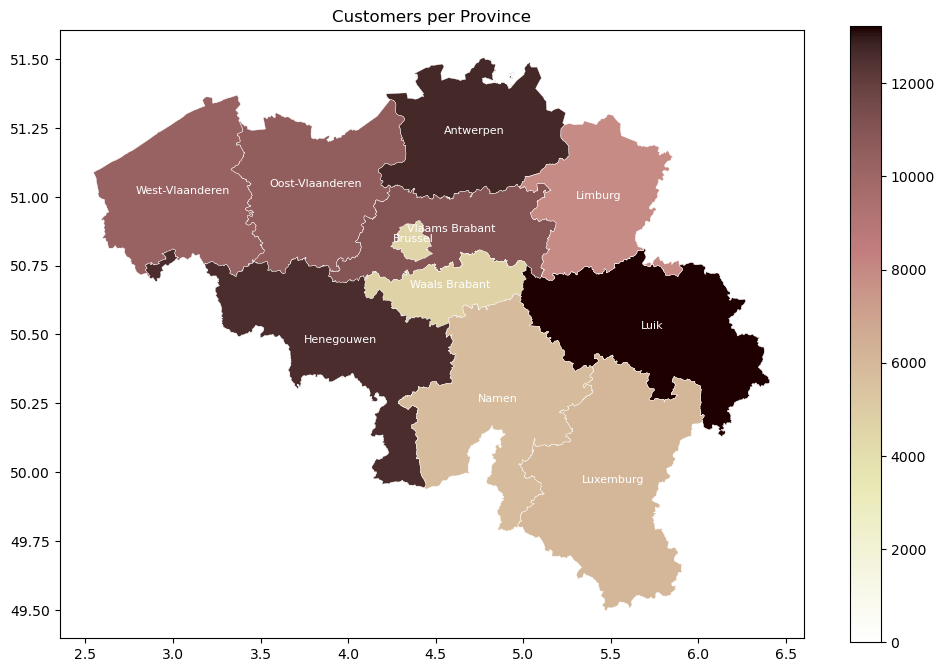

In [86]:
#you can use pastil1 or pink to ask your groupmate about it.
cmap = 'pink_r'  # You can directly specify the colormap name
norm = Normalize(vmin=0, vmax=merged['count'].max())

# Plot the map with the specified colormap
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='count', cmap=cmap, edgecolor='white', linewidth=0.3, ax=ax, norm=norm, legend=True)

# Add province names using the 'NE_Name' column in #a3d6d7
for idx, row in merged.iterrows():
    province_name = row['NE_Name']
    centroid_x, centroid_y = row['geometry'].centroid.coords[0]
    ax.annotate(text=province_name, xy=(centroid_x, centroid_y), fontsize=8, color='white', horizontalalignment='center')
ax.set_title('Customers per Province')

# Show the plot
plt.show()


### question number two (Plot all sellers on a map of Belgium) <a class="anchor" id="q2"></a>
    

In [87]:
# group by province and count number of sellers
province_seller = sellers.groupby('province_name')['seller_id'].count().sort_values(ascending=False).reset_index()

# rename columns (so that we can easily merge later)
province_seller.rename(columns={'province_name': 'NE_Name', 'seller_id':'count'}, inplace=True)

# show
province_seller

,NE_Name,count
0,Luik,415
1,Antwerpen,369
2,Henegouwen,363
3,Oost-Vlaanderen,351
4,Vlaams Brabant,340
5,West-Vlaanderen,339
6,Limburg,252
7,Luxemburg,228
8,Namen,197
9,Waals Brabant,149


In [88]:
# merge map_df and province_cust so that we have the number of seller per province (i.e., count)
merged = map_df.merge(province_seller, on='NE_Name', how='inner')

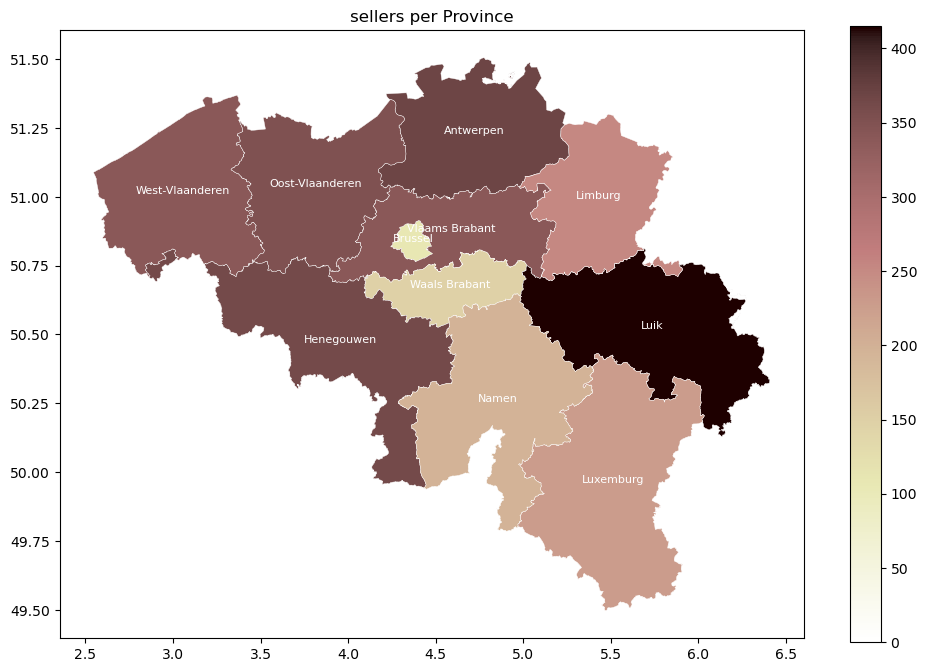

In [89]:
#you can use pastil1 or pink to ask your groupmate about it.
cmap = 'pink_r'  # You can directly specify the colormap name
norm = Normalize(vmin=0, vmax=merged['count'].max())

# Plot the map with the specified colormap
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='count', cmap=cmap, edgecolor='white', linewidth=0.3, ax=ax, norm=norm, legend=True)

# Add province names using the 'NE_Name' column in #a3d6d7
for idx, row in merged.iterrows():
    province_name = row['NE_Name']
    centroid_x, centroid_y = row['geometry'].centroid.coords[0]
    ax.annotate(text=province_name, xy=(centroid_x, centroid_y), fontsize=8, color='white', horizontalalignment='center')
ax.set_title('sellers per Province')

# Show the plot
plt.show()

### question number four (What are the most popular product categories in terms of sales volume and revenue?) <a class="anchor" id="q4"></a>
    

In [90]:
#merge products and order_item
product_order = pd.merge(products, order_items, how="inner", on="product_id")
product_order = product_order[['product_category_name', 'price']]

#group by this merge based on category
group_by_product_category_name_revenue=product_order.groupby("product_category_name")["price"].sum()

In [91]:
group_by_product_category_name_revenue.head()

product_category_name
agro_industry_and_commerce    70153.10
air_conditioning              52715.66
art                           23463.33
arts_and_craftmanship          1798.02
audio                         49251.82
Name: price, dtype: float64

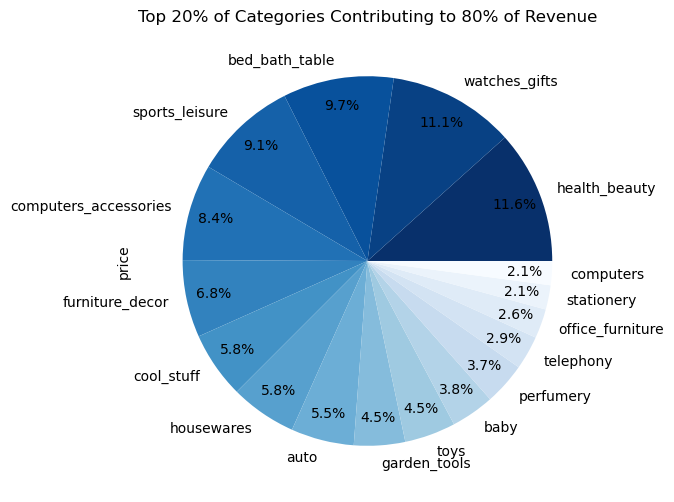

In [92]:
# Sort the Series in descending order
sorted_categories = group_by_product_category_name_revenue.sort_values(ascending=False)

# Calculate the cumulative sum of revenue
cumulative_sum = sorted_categories.cumsum()

# Calculate the 80% threshold
total_revenue = cumulative_sum.max()
revenue_threshold = 0.8 * total_revenue

# Select the top 20% of product categories
selected_categories = sorted_categories[cumulative_sum <= revenue_threshold]

 # Define the colormap
cmap = plt.get_cmap("Blues_r")

# Create a pie chart for the selected categories with pink colormap
ax = selected_categories.plot(kind='pie', figsize=(10, 6), cmap=cmap, autopct='%1.1f%%', pctdistance=0.85)
# Add a title
plt.title('Top 20% of Categories Contributing to 80% of Revenue')

# Show the pie chart
plt.show()


In [93]:
# Calculate the volume of each category (number of times products are ordered)
volume_by_category = product_order.groupby("product_category_name").size()
volume_by_category.head()

product_category_name
agro_industry_and_commerce    204
air_conditioning              285
art                           194
arts_and_craftmanship          23
audio                         358
dtype: int64

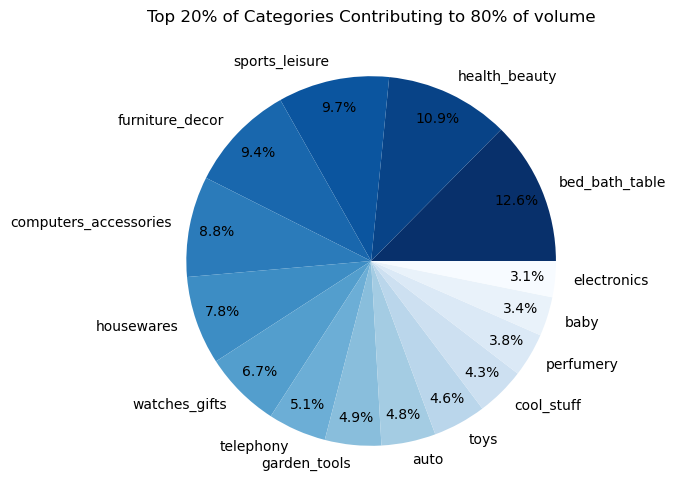

In [94]:
# Sort the Series in descending order
sorted_categories = volume_by_category.sort_values(ascending=False)
# Calculate the cumulative sum of revenue
cumulative_sum = sorted_categories.cumsum()
# Calculate the 80% threshold
total_revenue = cumulative_sum.max()
revenue_threshold = 0.8 * total_revenue
# Select the top 20% of product categories
selected_categories = sorted_categories[cumulative_sum <= revenue_threshold]
# Define the colormap
cmap = plt.get_cmap("Blues_r")

# Create a pie chart for the selected categories with pink colormap
ax = selected_categories.plot(kind='pie', figsize=(10, 6), cmap=cmap, autopct='%1.1f%%', pctdistance=0.85)

# Add a title
ax.set_title('Top 20% of Categories Contributing to 80% of volume')

# Remove the x-label (price)
ax.set_xlabel('')

# Show the pie chart
plt.show()


### question number five (Is there a relationship between the review score given by customers and the characteristics of the purchased product (e.g., price, category, etc.)?)  <a class="anchor" id="q5"></a>
    

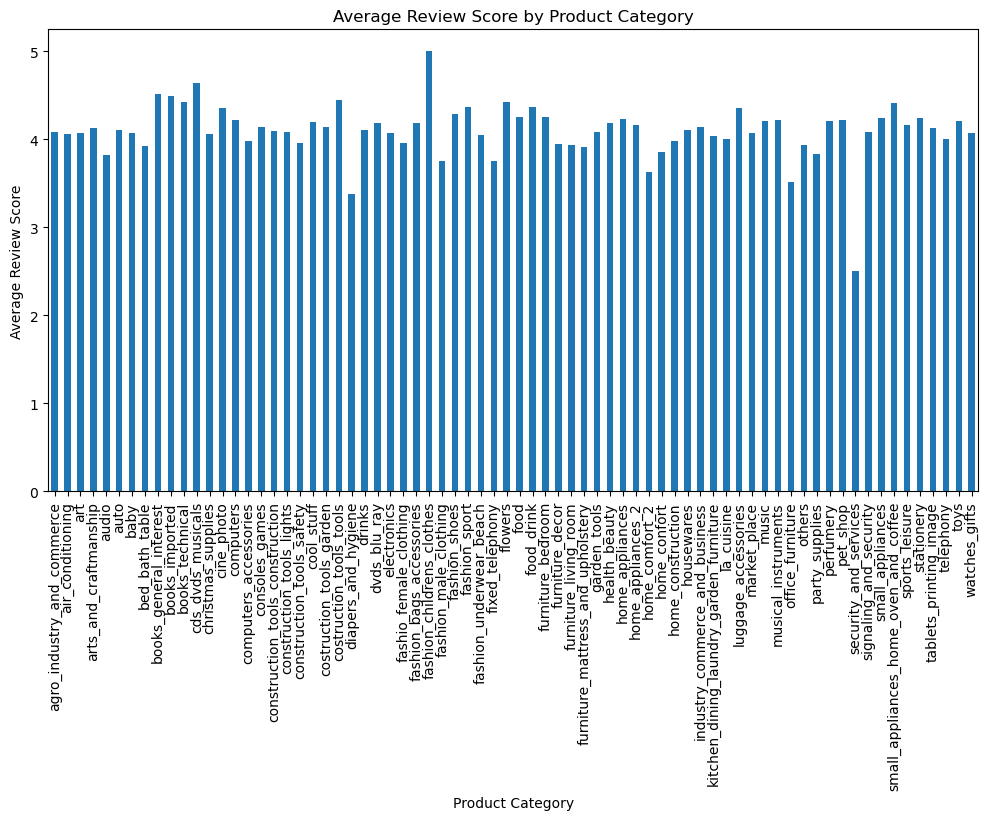

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [95]:
#review_score-product/price-histogram
merged_data = pd.merge(order_reviews, order_items, on="order_id")
merged_data = pd.merge(merged_data, products, on="product_id")

average_review_by_category = merged_data.groupby("product_category_name")["review_score"].mean()
price_ranges = pd.qcut(merged_data["price"], q=5)
average_review_by_price = merged_data.groupby(price_ranges)["review_score"].mean()

plt.figure(figsize=(12, 6))
average_review_by_category.plot(kind="bar")
plt.title("Average Review Score by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Review Score")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 6))


In [96]:
from scipy.stats import pearsonr
merged_data2 = orders.merge(order_reviews, on='order_id')
merged_data2 = merged_data.merge(products, on='product_id')
correlation, _ = pearsonr(merged_data['review_score'], merged_data['price'])
correlation

0.0033052369768886577

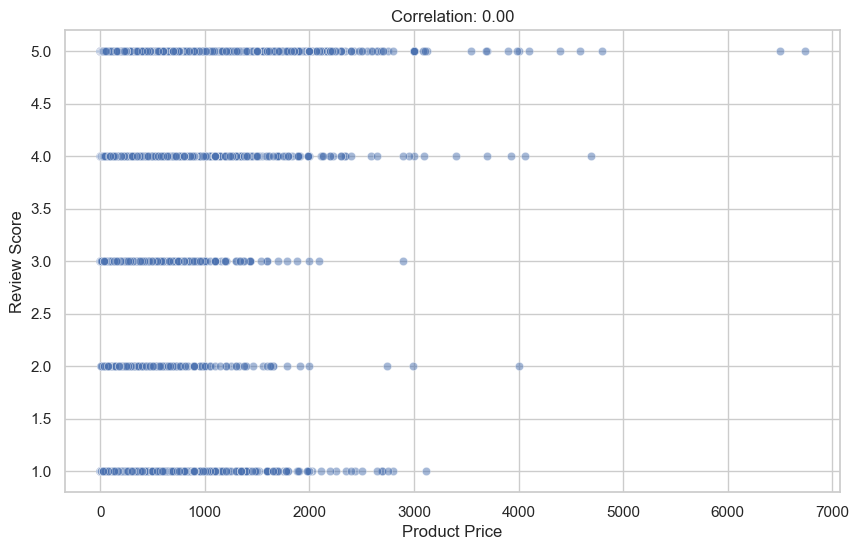

         product_category_name  review_score
0   agro_industry_and_commerce      4.088235
1             air_conditioning      4.057143
2                          art      4.067708
3        arts_and_craftmanship      4.130435
4                        audio      3.819718
..                         ...           ...
67                  stationery      4.241450
68      tablets_printing_image      4.123457
69                   telephony      3.999540
70                        toys      4.204706
71               watches_gifts      4.071104

[72 rows x 2 columns]


In [97]:
#scatter plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_score', data=merged_data, alpha=0.5)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Product Price')
plt.ylabel('Review Score')
plt.show()
category_review_mean = merged_data.groupby('product_category_name')['review_score'].mean().reset_index()
print(category_review_mean)
#While there is a weak correlation, the wide variability in review scores suggests that price alone does not explain the complete picture.


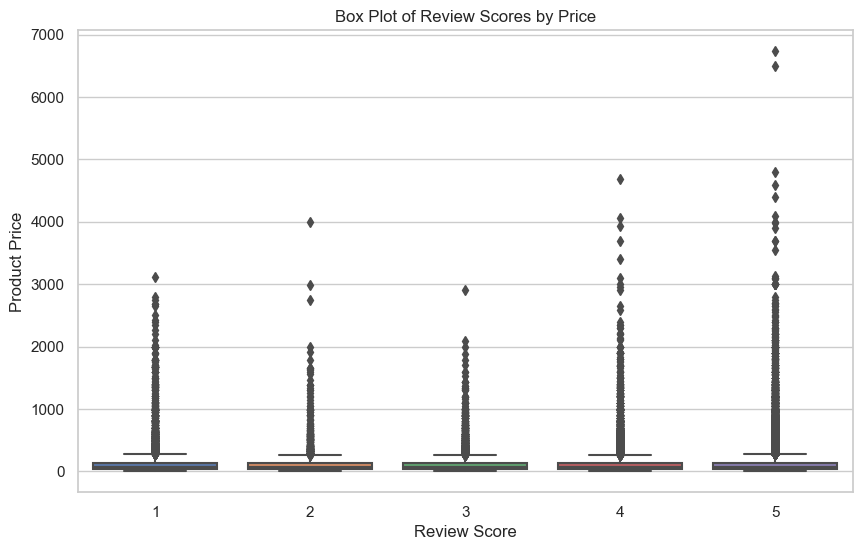

In [98]:
#price-box_plot
merged_data3 = orders.merge(order_reviews, on='order_id')
merged_data3 = merged_data.merge(products, on='product_id')
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='price', data=merged_data)
plt.title('Box Plot of Review Scores by Price')
plt.xlabel('Review Score')
plt.ylabel('Product Price')
plt.show()


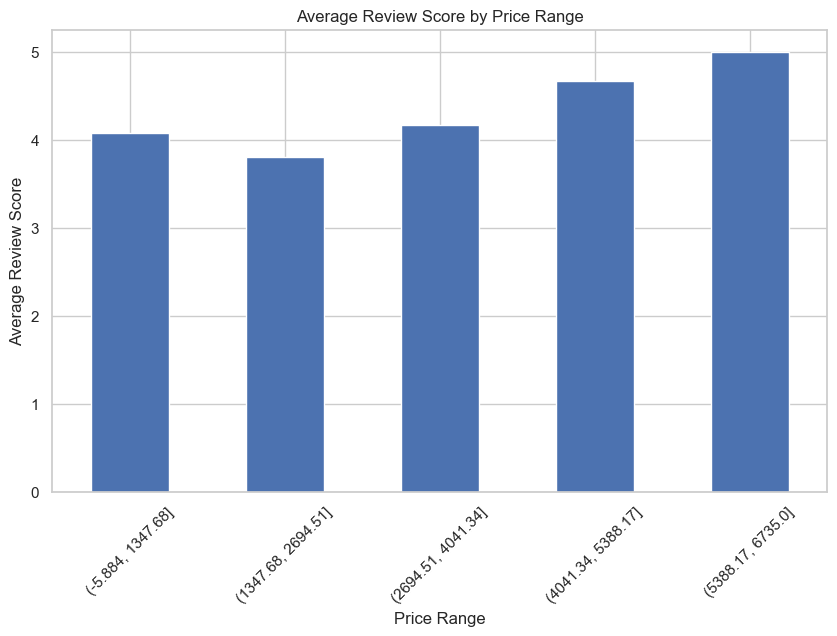

In [99]:
#price-histogram
merged_data4 = orders.merge(order_reviews, on='order_id')
merged_data4 = merged_data.merge(products, on='product_id')

price_bins = pd.cut(merged_data['price'], bins=5)  # Adjust the number of bins as needed
average_review_by_price = merged_data.groupby(price_bins)['review_score'].mean()
plt.figure(figsize=(10, 6))
average_review_by_price.plot(kind='bar')
plt.title('Average Review Score by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.show()

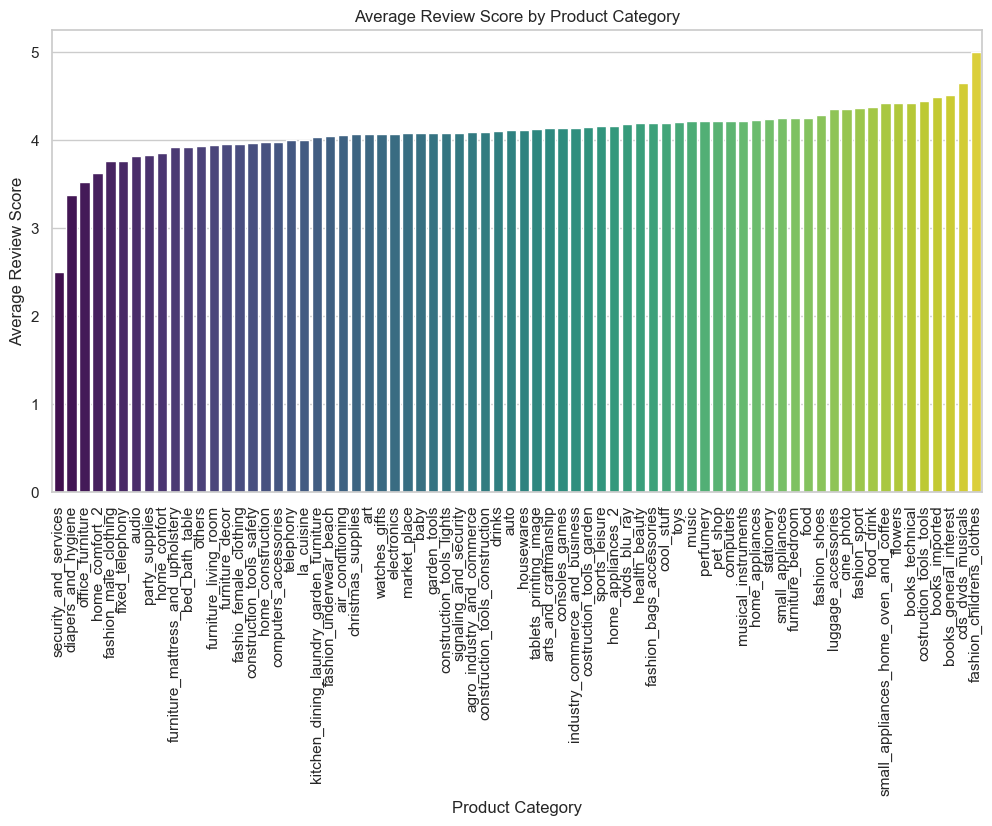

In [100]:
#product
average_review_by_category = merged_data.groupby('product_category_name')['review_score'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=average_review_by_category.index, y=average_review_by_category.values, palette='viridis')
plt.title('Average Review Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.xticks(rotation=90)
plt.show()

In [101]:
# Create a DataFrame
average_review_by_category = pd.DataFrame({'product_category_name': average_review_by_category.index, 'mean_score': average_review_by_category.values})

# Optional: To reset the index of the DataFrame
average_review_by_category.reset_index(drop=True, inplace=True)


In [102]:
contingency_table = pd.crosstab(average_review_by_category['product_category_name'], average_review_by_category['mean_score'])

In [103]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared statistic: 5111.999999999999
P-value: 0.2387138505696408


In [104]:
# collapse the order_payments dataset so that we have one row for each unique order_id
# NOTE: this will drop the payment_sequential and payment_installments columns and the payment_type column will be the last one
grouped_df = order_payments.groupby(['order_id'])['payment_value'].sum().reset_index()

# rename column to 'total_amount_due'
grouped_df = grouped_df.rename(columns={'payment_value': 'total_amount_due'})

# left merge with orders dataset (we add the payment value column)
orders_with_price = pd.merge(orders, grouped_df, on='order_id', how='left')
orders_with_price =orders_with_price.dropna()

In [105]:
# NOTE: inner join between orders_with_price and order_reviews (i.e., we only select observations for which we have full data for both datasets) 
# followed by left join with customers dataset to add the customer information
features_df = orders_with_price.merge(order_reviews, on="order_id", how="inner").merge(customers, on='customer_id', how='left')

# drop columns
features_df = features_df.drop(columns=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_status',
                                        'customer_id', 'review_id', 'language'], axis=1)

# show
features_df.head(2)

,order_id,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,total_amount_due,review_score,review_creation_date,review_answer_timestamp,review_comment_title,review_comment_message,zip_code,city_name,province_name,region_name,gender,birthday
0,e481f51cbdc54678b7cc49136f2d6af7,642.0,56.795833,145.503611,170.579722,202.477778,38.71,4,2017-10-11 00:00:00,2017-10-12 03:43:48,NaN,"Ich habe das Produkt noch nicht getestet, aber...",8640,Vleteren,West-Vlaanderen,Flemish Region,M,1969-01-21
1,53cdb2fc8bc7dce0b6741e2150273451,110570.0,11.109167,288.945833,128.537500,330.768889,141.46,4,2018-08-08 00:00:00,2018-08-08 18:37:50,Très bien le magasin,Le produit est très bon.,8000,Brugge,West-Vlaanderen,Flemish Region,M,1942-12-03


In [106]:
# count number of characters in review and drop original column
features_df['nr_chars_review'] = features_df['review_comment_message'].apply(lambda x: 0 if pd.isnull(x) else len(x))
features_df = features_df.drop('review_comment_message', axis=1)

# count number of characters in review title and drop original column
features_df['nr_chars_title'] = features_df['review_comment_title'].apply(lambda x: 0 if pd.isnull(x) else len(x))
features_df = features_df.drop('review_comment_title', axis=1)

In [107]:
# calculate age from birthday (see previous notebook)

# define reference date
ref_date = orders['order_delivered_customer_date'].max()
print(ref_date)

# calculate the age of a customer
features_df['age'] = (ref_date - features_df['birthday']).dt.days // 365.25

# drop birthday column
features_df = features_df.drop('birthday', axis=1)

2018-10-17 13:22:46


In [108]:
# convert to datetime
features_df['review_creation_date'] = pd.to_datetime(features_df['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
features_df['review_answer_timestamp'] = pd.to_datetime(features_df['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S')

# calculate the time between sending the satisfaction survey and the answer
features_df['answer_time'] = (features_df['review_answer_timestamp'] - features_df['review_creation_date']).dt.total_seconds() / 86400. # in days

# drop original columns
features_df = features_df.drop(['review_creation_date', 'review_answer_timestamp'], axis=1)

In [109]:
# gender are categroical and should be converted to dummy variables
features_df = pd.get_dummies(features_df, columns=['gender'], drop_first=True, dtype=float)

In [110]:
features_df.head(1)

,order_id,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,total_amount_due,review_score,zip_code,city_name,province_name,region_name,nr_chars_review,nr_chars_title,age,answer_time,gender_M
0,e481f51cbdc54678b7cc49136f2d6af7,642.0,56.795833,145.503611,170.579722,202.477778,38.71,4,8640,Vleteren,West-Vlaanderen,Flemish Region,196,0,49.0,1.155417,1.0


In [111]:
# create dependent variable (binary)
features_df['review_score'] = features_df['review_score'].apply(lambda x: 1 if x >=3 else 0)

In [112]:
# drop identifier columns
features_df = features_df.drop(['order_id'], axis=1)

In [113]:
# NOTE: we will use the following variables to predict the review score
independent_features = ['purchased_delivered', 'nr_chars_review', 'nr_chars_title', 'answer_time', 'gender_M', 'age']

# Independent Features (X)
X = features_df[independent_features]

# review_score is the target column / Dependent Variable (y)
y = features_df[['review_score']]

In [114]:
# scale features

# initialize scaler
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler
scaler = StandardScaler()

# fit scaler on numerical features only
numerical_features = X.columns.drop(['gender_M'])
scaler.fit(X[numerical_features])

# apply tansformation
X[numerical_features] = scaler.transform(X[numerical_features])

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\3729829780.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.transform(X[numerical_features])


In [115]:
# check result
X.describe()

,purchased_delivered,nr_chars_review,nr_chars_title,answer_time,gender_M,age
count,9.499200e+04,9.499200e+04,9.499200e+04,9.499200e+04,94992.000000,9.499200e+04
mean,-1.726390e-16,2.101888e-17,-7.644588e-17,-1.832607e-17,0.483799,3.149091e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499740,1.000005e+00
min,-1.270845e+00,-5.706118e-01,-3.081846e-01,-3.115870e-01,0.000000,-1.744104e+00
25%,-6.088470e-01,-5.706118e-01,-3.081846e-01,-2.174764e-01,0.000000,-8.656761e-01
50%,-2.443249e-01,-5.706118e-01,-3.081846e-01,-1.492381e-01,0.000000,1.275215e-02
75%,3.369573e-01,2.406661e-01,-3.081846e-01,-3.289695e-03,1.000000,8.449473e-01
max,2.064957e+01,5.182086e+00,1.226710e+01,5.256222e+01,1.000000,1.723376e+00


In [116]:
# import statsmodels package
import statsmodels.api as sm

# run multivariate logistic regression
X = sm.add_constant(X) # adding a constant: Y = beta0 + beta1*X1 + beta2*X2 + espilon instead of Y = beta1*X1 + beta2*X2 + epsilon

# fit model
model = sm.Logit(y, X).fit()

# show model summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.292800
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           review_score   No. Observations:                94992
Model:                          Logit   Df Residuals:                    94985
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.2365
Time:                        15:33:04   Log-Likelihood:                -27814.
converged:                       True   LL-Null:                       -36429.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3566      0.017    139.749      0.000       2.324       2.390
purchased_delivered    -0.7765      0.010    -74.141      0.000      -0.797      -0.756
nr_chars_review        -0.8051      0.009    -90.535      0.000      -0.823      -0.788
nr_chars_title         -0.1227      0.009    -13.555      0.000      -0.140      -0.105
answer_time             0.0254      0.014      1.850      0.064      -0.002       0.052
gender_M               -0.0037      0.022     -0.164      0.870      -0.048       0.040
age                     0.0052      0.011      0.466      0.641      -0.017       0.027
=======================================================================================
"""

The model indicates `purchased_delivered`, `nr_chars_review`, and `nr_chars_title` have a significant negative relationship with the `order review` (binary!), with `nr_chars_review` having the greatest influence. The **pseudo R²** (i.e., a substitute of the familiar R² available under OLS in a regression case) of **slightly above 0.23** indicates a model which learns some useful relationships, but misses a lot of relevant control variables. However, we did not check the assumptions made by the multivariate linear regression model (e.g., multicollinearity), which could possibly violate the validity of our results. You should do these checks for your group assignment, as well as those for other tests/models.

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\1998043819.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(features_df.corr(),2), annot=True)


<Axes: >

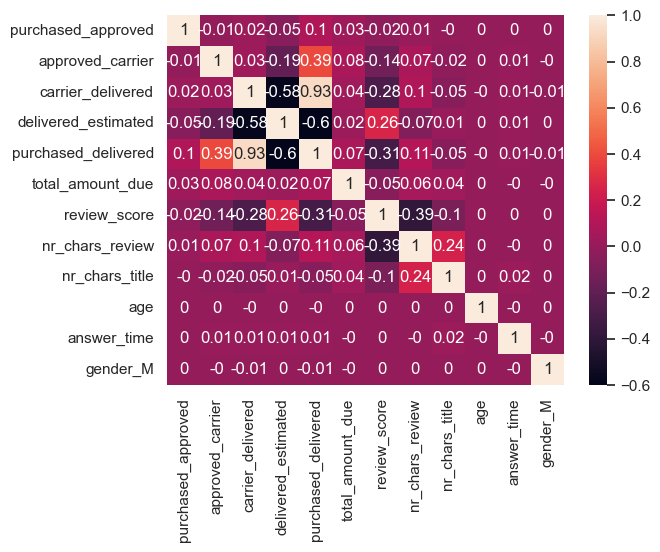

In [117]:
sns.heatmap(np.round(features_df.corr(),2), annot=True)

### question number six (Can we identify any seasonal patterns or trends in sales performance over time?)  <a class="anchor" id="q6"></a>
    

In [118]:
new_orders=orders
# Extract the month from the 'order_purchase_timestamp' column
new_orders['month'] = new_orders['order_purchase_timestamp'].dt.month

# Define a mapping of months to seasons
season_mapping = {
    12: 'Winter',  # December
    1: 'Winter',   # January
    2: 'Winter',   # February
    3: 'Spring',   # March
    4: 'Spring',   # April
    5: 'Spring',   # May
    6: 'Summer',   # June
    7: 'Summer',   # July
    8: 'Summer',   # August
    9: 'Autumn',   # September
    10: 'Autumn',  # October
    11: 'Autumn'   # November
}

# Add a new 'season' column based on the 'month'
new_orders['season'] = new_orders['month'].map(season_mapping)

# Merge new_orders and order_items
NewOrder_OrderItem = pd.merge(new_orders, order_items, how="inner", on="order_id")

# Group by the merged DataFrame based on the "season" column and calculate the sum of "price"
seasonly_total = NewOrder_OrderItem.groupby("season")["price"].sum()

# Create a DataFrame
seasonly_total = pd.DataFrame({'season': seasonly_total.index, 'revenue': seasonly_total.values})

# Optional: To reset the index of the DataFrame
seasonly_total.reset_index(drop=True, inplace=True)

#show
seasonly_total

,season,revenue
0,Autumn,2280395.90
1,Spring,4028900.30
2,Summer,3919708.33
3,Winter,2817296.50


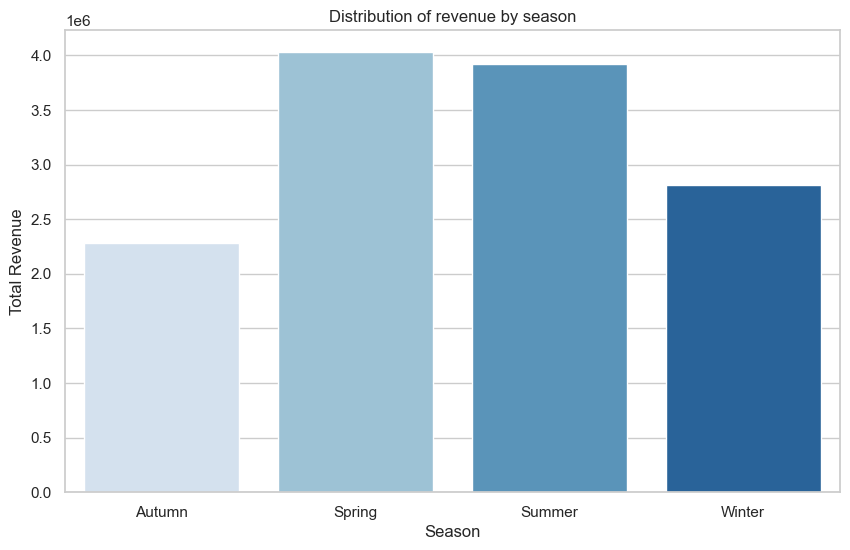

In [119]:
# Create a bar plot of revenue by season
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=seasonly_total, x="season", y='revenue', palette="Blues")
plt.title("Distribution of revenue by season")
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.show()

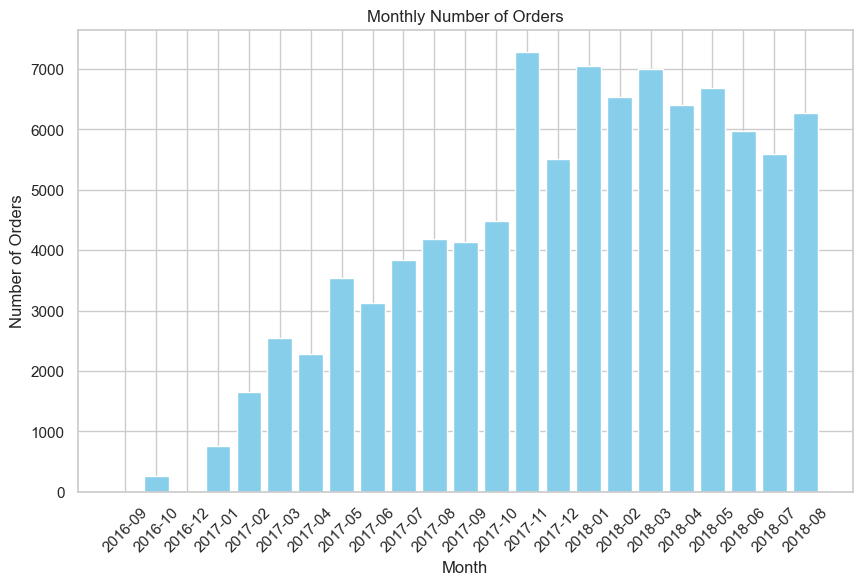

In [120]:
#Monthly orders chart
df=orders
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')

monthly_order_counts = df['order_purchase_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_order_counts.index.astype(str), monthly_order_counts.values,color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Number of Orders')
plt.xticks(rotation=45)
plt.show()


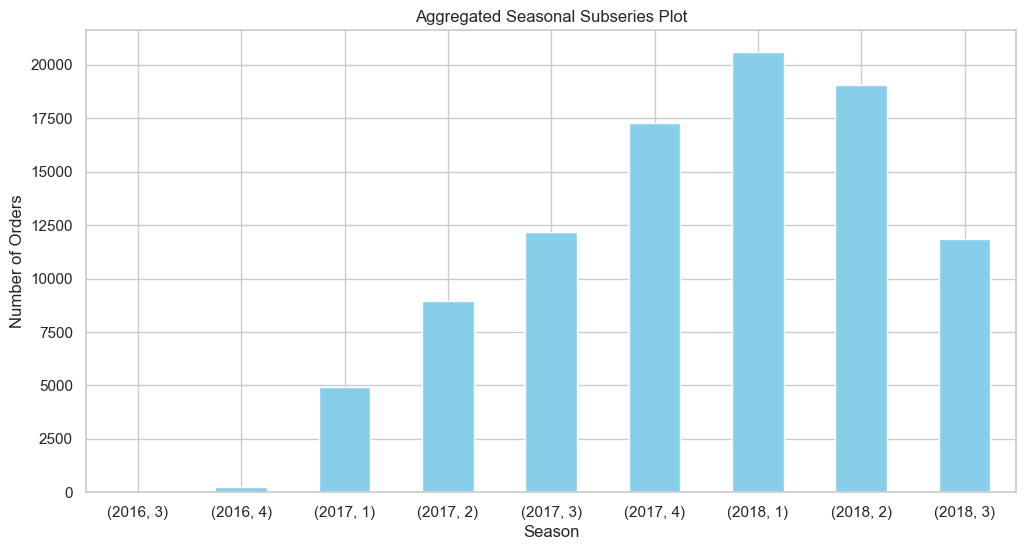

In [121]:
#Let's now look at the order data in a quarterly manner
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month

def get_season(month):
    if 1 <= month <= 3:
        return 1  # Season 1
    elif 4 <= month <= 6:
        return 2  # Season 2
    elif 7 <= month <= 9:
        return 3  # Season 3
    else:
        return 4  # Season 4

df['season'] = df['month'].apply(get_season)

# Create a Seasonal Subseries Plot
seasonal_data = df.groupby(['year', 'season'])['order_purchase_timestamp'].count()

plt.figure(figsize=(12, 6))
seasonal_data.plot(kind='bar',color='skyblue')
plt.title('Aggregated Seasonal Subseries Plot')
plt.xlabel('Season')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


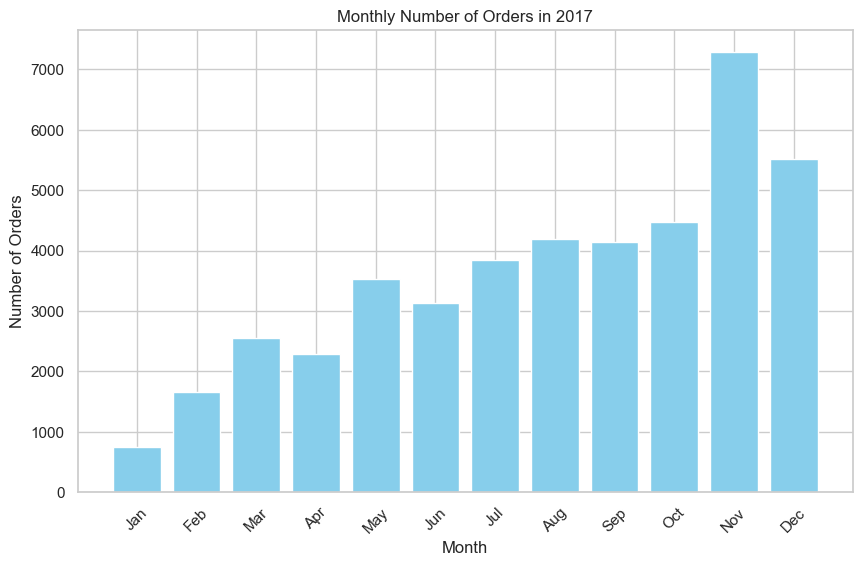

In [122]:
# Lets take a closer look at 2017 since it is the only full year we have in our data
df = orders
df['purchasing'] = pd.to_datetime(orders['order_purchase_timestamp'])
df['delivered'] = pd.to_datetime(orders['order_delivered_customer_date'])
df['estimated'] = pd.to_datetime(orders['order_estimated_delivery_date'])
df['time_to_delivery'] = np.busday_count(df['purchasing'].values.astype('datetime64[D]'), df['delivered'].values.astype('datetime64[D]'))
df['diff_estimated_delivery'] = np.busday_count(df['estimated'].values.astype('datetime64[D]'), df['delivered'].values.astype('datetime64[D]'))
df = pd.DataFrame(df)
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Filter for 2017 months
df_2017 = df[df['order_purchase_timestamp'].dt.year == 2017]

monthly_order_counts = df_2017['order_purchase_month'].value_counts().sort_index()
monthly_order_counts.index = monthly_order_counts.index.strftime('%b')
plt.figure(figsize=(10, 6))
plt.bar(monthly_order_counts.index, monthly_order_counts,color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Number of Orders in 2017')
plt.xticks(rotation=45)
plt.show()



In [123]:
#Now we will statistically test whether orders as a whole show significant seasonalty by using KPSS test

import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

merged_data = pd.merge(orders, order_items, on='order_id', how='inner')
merged_data = pd.merge(merged_data, products, on='product_id', how='inner')
order_dates = merged_data['order_purchase_timestamp']

# Perform the KPSS test to check for seasonality
kpss_stat, p_value, lags, critical_values = kpss(order_dates)

print(f'KPSS Statistic: {kpss_stat}')
print(f'P-value: {p_value}')
print(f'Number of Lags: {lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print('The data is not stationary, indicating possible seasonality.')
else:
    print('The data may be stationary, suggesting no strong seasonality.')
#

KPSS Statistic: 0.12987099998190205
P-value: 0.1
Number of Lags: 145
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The data may be stationary, suggesting no strong seasonality.


C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\2923156568.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(order_dates)


In [124]:
# Eventough orders as a whole don't show seasonality different product categories may show seasonality we will apply the same test to each category

# List of unique product categories
unique_categories = products['product_category_name'].dropna().unique()
# Method gives error for security and services category because there is only one order, we will eliminate it from the dataset
unique_categories = [category for category in unique_categories if category != 'security_and_services']
# KPSS test function for a specific category
def perform_kpss_test(category_name):
    # Category filter
    category_data = merged_data[merged_data['product_category_name'] == category_name]

    order_dates = category_data['order_purchase_timestamp']

    # Number of orders per month
    monthly_orders = order_dates.groupby(order_dates.dt.to_period('M')).count()
    monthly_orders = monthly_orders.dropna()

    # KPSS test to check for stationarity
    kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)

    return kpss_stat, p_value

# KPSS test for each product category
for category in unique_categories:
    kpss_stat, p_value = perform_kpss_test(category)

    print(f'Category: {category}')
    print(f'KPSS Statistic: {kpss_stat}')
    print(f'P-value: {p_value}')
    print('---')

    # Results
    if p_value < 0.05:
        print('The monthly orders are not stationary.Indicating possible seasonality.')
    else:
        print('The monthly orders may be stationary.')
    print('\n')


Category: perfumery
KPSS Statistic: 0.5680570554138215
P-value: 0.026338501032923088
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: art
KPSS Statistic: 0.5267262534146161
P-value: 0.03564724022193331
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: sports_leisure
KPSS Statistic: 0.5943290360397613
P-value: 0.023151905814567154
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: baby
KPSS Statistic: 0.752617876911944
P-value: 0.01
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: housewares
KPSS Statistic: 0.7455258802591023
P-value: 0.01
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: musical_instruments
KPSS Statistic: 0.6458348827497038
P-value: 0.01846955611366329
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: cool_stuff
KPSS Statistic: 0.2636903875724544
P-

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test sta

Category: toys
KPSS Statistic: 0.2736453737962387
P-value: 0.1
---
The monthly orders may be stationary.


Category: bed_bath_table
KPSS Statistic: 0.661264512480297
P-value: 0.017066862501791173
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: construction_tools_safety
KPSS Statistic: 0.6155924921306016
P-value: 0.021218864351763487
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: computers_accessories
KPSS Statistic: 0.5212948664177741
P-value: 0.03687052558158241
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: health_beauty
KPSS Statistic: 0.8278908437925864
P-value: 0.01
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: luggage_accessories
KPSS Statistic: 0.24494840379269217
P-value: 0.1
---
The monthly orders may be stationary.


Category: garden_tools
KPSS Statistic: 0.3825722662700569
P-value: 0.0846671266077341
---
The monthly o

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test sta

Category: telephony
KPSS Statistic: 0.5403538557438676
P-value: 0.03257796041804783
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: stationery
KPSS Statistic: 0.48713832509204086
P-value: 0.044563440294585394
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: fashion_bags_accessories
KPSS Statistic: 0.5215900611887871
P-value: 0.036804040272795685
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: computers
KPSS Statistic: 0.1173280012196623
P-value: 0.1
---
The monthly orders may be stationary.


Category: home_construction
KPSS Statistic: 0.6243521174222209
P-value: 0.0204225347797981
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: watches_gifts
KPSS Statistic: 0.7382405271012924
P-value: 0.0100690429907916
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: construction_tools_construction
KPSS Statist

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test sta

Category: small_appliances
KPSS Statistic: 0.6605810881609412
P-value: 0.01712899198536898
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: agro_industry_and_commerce
KPSS Statistic: 0.5175973125782384
P-value: 0.03770330797787424
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: others
KPSS Statistic: 0.20444283684233208
P-value: 0.1
---
The monthly orders may be stationary.


Category: furniture_living_room
KPSS Statistic: 0.5364059332964809
P-value: 0.03346713214043223
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: signaling_and_security
KPSS Statistic: 0.8076599753160193
P-value: 0.01
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: air_conditioning
KPSS Statistic: 0.6749451570030902
P-value: 0.015823167545173614
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: consoles_games
KPSS Statistic: 0.

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test sta

Category: fashion_male_clothing
KPSS Statistic: 0.16427786135863903
P-value: 0.1
---
The monthly orders may be stationary.


Category: kitchen_dining_laundry_garden_furniture
KPSS Statistic: 0.5540192372297575
P-value: 0.029500171795099648
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: industry_commerce_and_business
KPSS Statistic: 0.42864620067963777
P-value: 0.06480767212084579
---
The monthly orders may be stationary.


Category: fixed_telephony
KPSS Statistic: 0.1196462191864793
P-value: 0.1
---
The monthly orders may be stationary.


Category: construction_tools_lights
KPSS Statistic: 0.7180495229678473
P-value: 0.01190458882110479
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: books_technical
KPSS Statistic: 0.6178416356380425
P-value: 0.021014396760177953
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: home_appliances_2
KPSS Statistic: 0.6501878205707932
P-value

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)


Category: home_confort
KPSS Statistic: 0.20180048123461583
P-value: 0.1
---
The monthly orders may be stationary.


Category: audio
KPSS Statistic: 0.6488920248396469
P-value: 0.018191634105486642
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: food_drink
KPSS Statistic: 0.5573891760580104
P-value: 0.02874117656351116
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: music
KPSS Statistic: 0.4602745424292846
P-value: 0.051174766194273885
---
The monthly orders may be stationary.


Category: food
KPSS Statistic: 0.8421569415279537
P-value: 0.01
---
The monthly orders are not stationary.Indicating possible seasonality.


Category: tablets_printing_image
KPSS Statistic: 0.35839478648602274
P-value: 0.09508845410085226
---
The monthly orders may be stationary.


Category: small_appliances_home_oven_and_coffee
KPSS Statistic: 0.5178288219256196
P-value: 0.037651166232968554
---
The monthly orders are not stationary.I

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test sta

Category: flowers
KPSS Statistic: 0.3637992831541219
P-value: 0.09275892967494745
---
The monthly orders may be stationary.


Category: home_comfort_2
KPSS Statistic: 0.09937888198757765
P-value: 0.1
---
The monthly orders may be stationary.


Category: furniture_mattress_and_upholstery
KPSS Statistic: 0.3382403286545703
P-value: 0.1
---
The monthly orders may be stationary.


Category: cds_dvds_musicals
KPSS Statistic: 0.38888888888888873
P-value: 0.08194444444444451
---
The monthly orders may be stationary.




C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\704352493.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_orders)


### question number seven (Are there significant differences in sales performance between different locations)  <a class="anchor" id="q7"></a>
    

In [125]:
# order prices
order_price = pd.merge(orders, order_items, how="inner", on="order_id")
order_price = order_price[['order_id', 'seller_id', 'price']]
order_price.head(2)

,order_id,seller_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,118.70


In [126]:
# order locations
order_price = pd.merge(order_price, sellers, how="inner", on="seller_id")
order_price = order_price[['order_id', 'seller_id', 'price', 'province_name']]
order_price.head(2)

,order_id,seller_id,price,province_name
0,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,Oost-Vlaanderen
1,8736140c61ea584cb4250074756d8f3b,3504c0cb71d7fa48d967e0e4c94d59d9,75.90,Oost-Vlaanderen


In [127]:
# count of the orders in each province
order_count = order_price.groupby('province_name')['price'].count().reset_index()
order_count.columns = ['province_name', 'count']
order_count.head(2)


,province_name,count
0,Antwerpen,10947
1,Brussel,4837


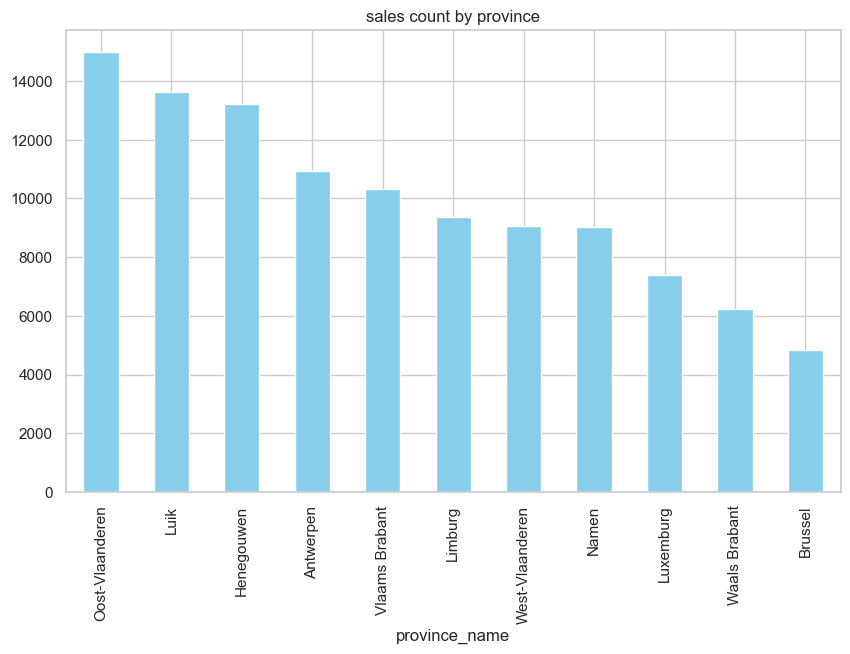

In [128]:
# Create a pie chart 
sorted_order_count = order_count.sort_values('count', ascending=False)
sorted_order_count = sorted_order_count.set_index('province_name')['count']
ax=sorted_order_count.plot(kind='bar', figsize=(10, 6), color="skyblue")
# Add a title
ax.set_title('sales count by province')
# Show the pie chart
plt.show()

In [129]:
province_names = order_price['province_name'].unique()

# Create a dictionary to store the lists for each province
province_price_dict = {}

# Iterate through each province name
for province in province_names:
    # Extract the 'price' values for the current province
    province_prices = order_price[order_price['province_name'] == province]['price'].tolist()
    
    # Add the list of prices to the dictionary with the province name as the key
    province_price_dict[province] = province_prices

province_prices = list(province_price_dict.values())

# Perform the ANOVA test on the price data for all provinces

f_statistic, p_value =f_oneway(*province_prices)
if p_value < 0.05:
    print("There are significant differences in performance between the provinces.")
else:
    print("There are no significant differences in performance between the provinces.")






There are significant differences in performance between the provinces.


### question number eight (. How does the payment method chosen by customers vary across different productcategories?)  <a class="anchor" id="q8"></a>

In [130]:
#adding_category
order_payment_method = pd.merge(order_payments, order_items, how="inner", on="order_id")
order_payment_method = pd.merge(order_payment_method, products, how="inner", on="product_id")
order_payment_method = order_payment_method[['order_id', 'product_id', 'payment_type', 'product_category_name']]

order_payment_method


,order_id,product_id,payment_type,product_category_name
0,b81ef226f3fe1789b1e8b2acac839d17,af74cc53dcffc8384b29e7abfa41902b,credit_card,home_construction
1,d86305c284cecff56c7ee9d3fbd4f8d6,af74cc53dcffc8384b29e7abfa41902b,credit_card,home_construction
2,a9810da82917af2d9aefd1278f1dcfa0,a630cc320a8c872f9de830cf121661a3,credit_card,auto
3,25e8ea4e93396b6fa0d3dd708e76c1bd,2028bf1b01cafb2d2b1901fca4083222,credit_card,perfumery
4,6df674fd09d933a85574460e32a94e23,2028bf1b01cafb2d2b1901fca4083222,credit_card,perfumery
...,...,...,...,...
113380,9a87b7f9b871b4725233e41e08811caa,e0c53c03a642ddca93689255bd4af194,credit_card,christmas_supplies
113381,6a87a0371f263aa8c1779c2c115c1427,1f58e3c365e615b33b2b30b068d7578a,credit_card,health_beauty
113382,e0657085c2b6297a32f39efa200cdf72,e2336d327209ca849dca5afda036f842,credit_card,electronics
113383,9ac048d7ffebba67d54456aa9ec07d7e,0dcb1adbafdcc389972874b01fa249b8,credit_card,sports_leisure


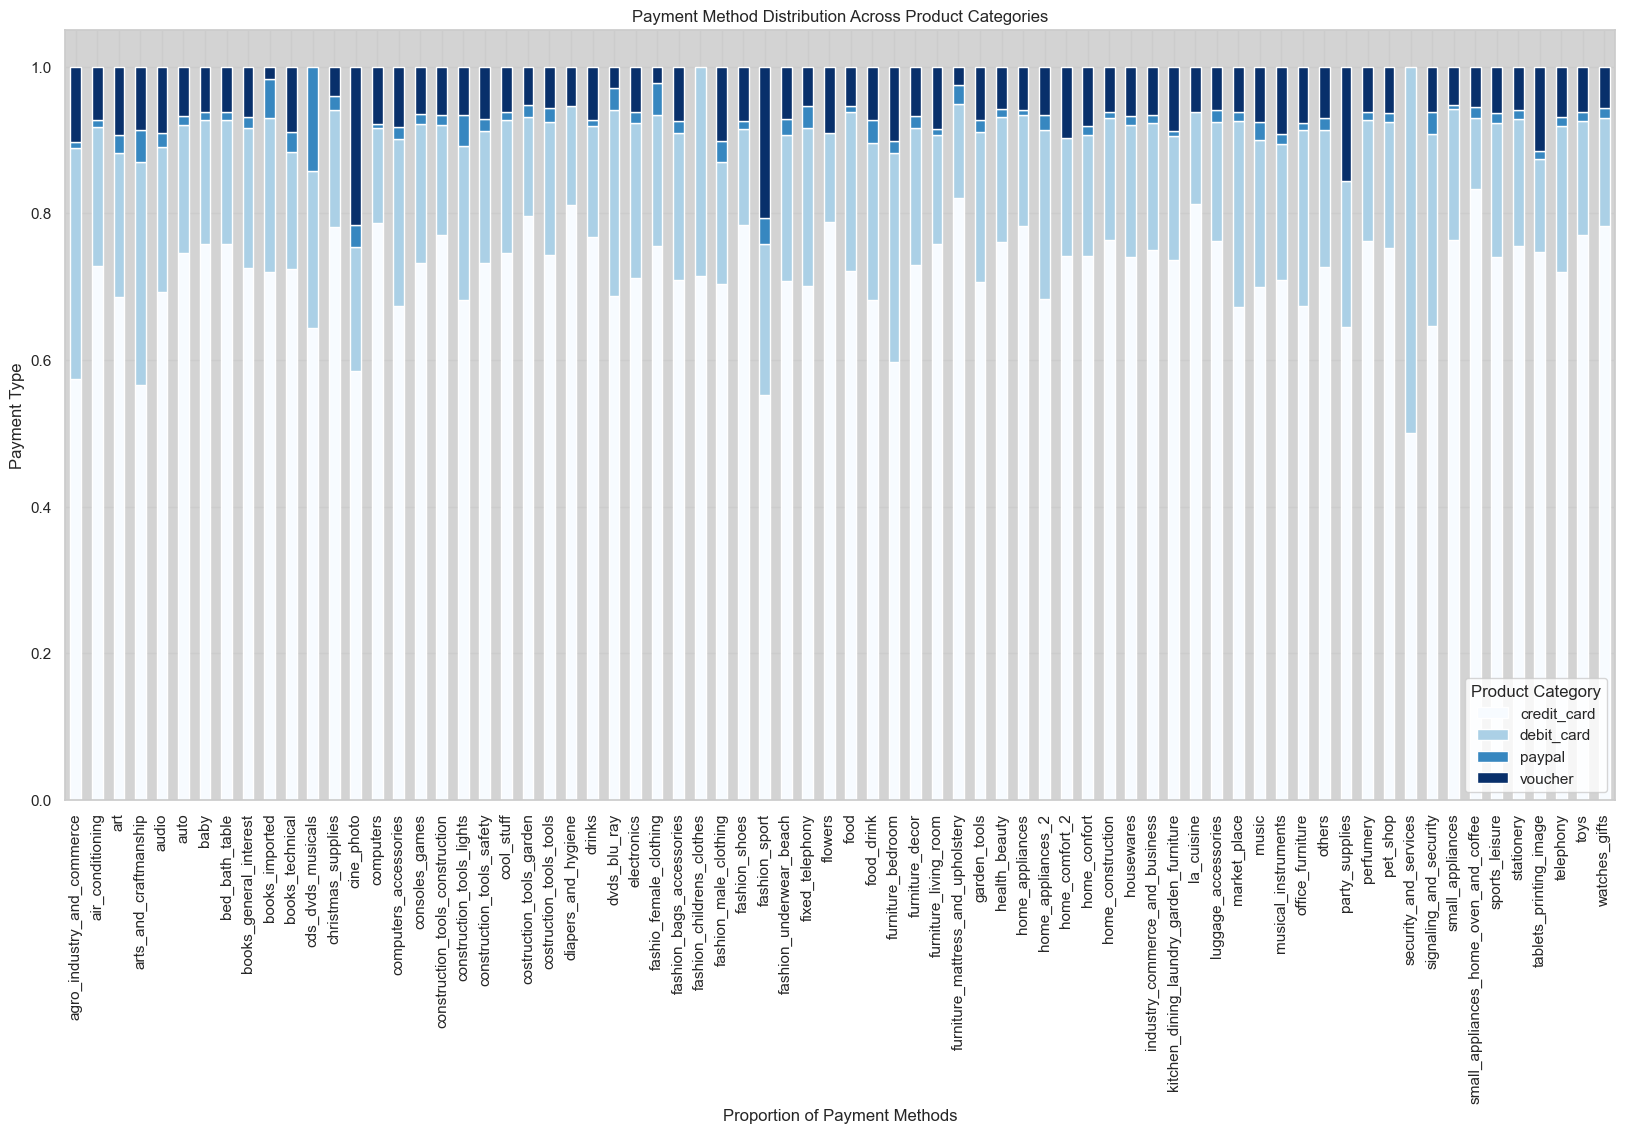

In [131]:
df =order_payment_method

# Group by 'product_category_name' and 'payment_type' and count the occurrences
payment_method_counts = df.groupby(['product_category_name', 'payment_type']).size().unstack(fill_value=0)

# Normalize to get proportions
payment_method_proportions = payment_method_counts.div(payment_method_counts.sum(axis=1), axis=0)

# Plot the proportions of payment methods using a stacked horizontal bar chart
ax=payment_method_proportions.plot(kind='bar', stacked=True, figsize=(20, 10),cmap='Blues')
ax.set_facecolor('lightgrey')
plt.title('Payment Method Distribution Across Product Categories')
plt.xlabel('Proportion of Payment Methods')
plt.ylabel('Payment Type')
plt.legend(title='Product Category', loc='lower right') 
plt.show()


### question number nine (Are some product categories more likely to experience low satisfaction than others?Visualize and proof statistically)  <a class="anchor" id="q9"></a>
    

use ANOVA when you want to compare the means or variances of numerical data across multiple groups. Use the chi-squared test when you want to assess the association or independence between categorical variables.

In [132]:
merged_data = pd.merge(order_items, order_reviews, on='order_id')
merged_data = pd.merge(merged_data, products, on='product_id')
merged_data=merged_data[['order_id','product_id','product_category_name','review_score']]
merged_data.head(2)

,order_id,product_id,product_category_name,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,5
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,5


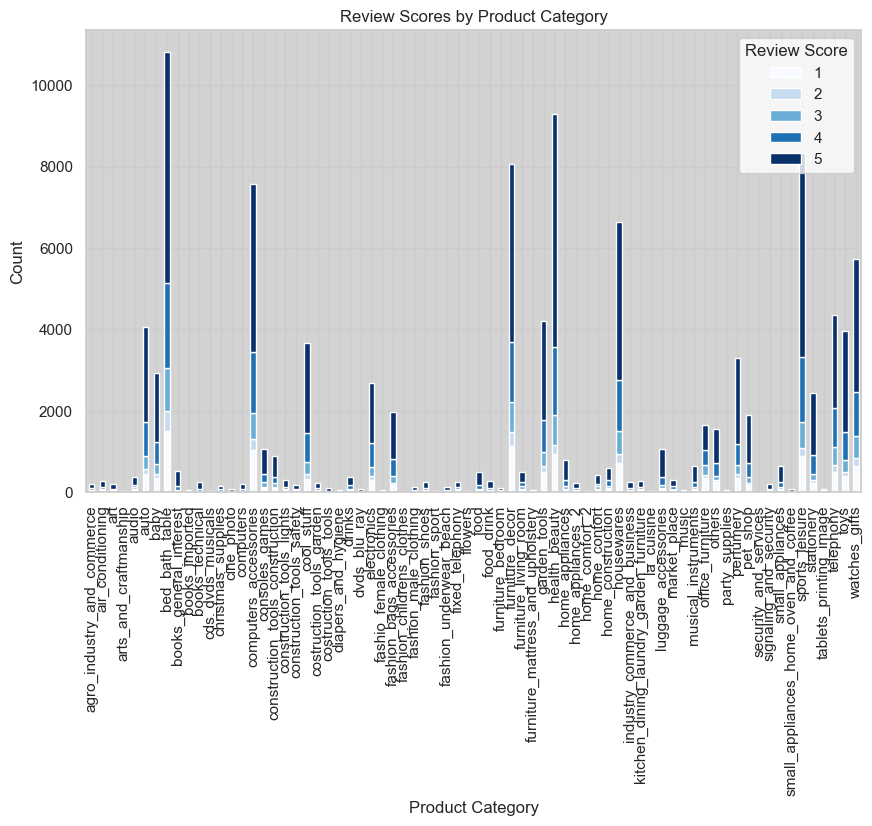

Chi-squared statistic: 1630.456757047789
P-value: 1.7587433097153468e-187
There is a significant association between product categories and review scores.


In [133]:
df =merged_data

# Create a contingency table
contingency_table = pd.crosstab(df['product_category_name'], df['review_score'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Visualize the results
ax=contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Blues')
ax.set_facecolor('lightgrey')
plt.title('Review Scores by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Review Score', loc='upper right')
plt.show()

# Print the chi-squared test results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Check for statistical significance
if p < 0.05:
    print("There is a significant association between product categories and review scores.")
else:
    print("There is no significant association between product categories and review scores.")


### question number ten (Is there a correlation between the number of payment installments chosen by
customers and their likelihood to default on the payment?)  <a class="anchor" id="q10"></a>
    

In [134]:
### question number eleven (Are there any identifiable clusters or segments among the customers based on their purchase behavior?)  <a class="anchor" id="q11"></a>
    

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

RFM analysis ranks each customer on the following factors:

Recency. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

Frequency. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

Monetary. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

In [135]:
import datetime as dt
# Get the current date

today_date = dt.datetime.now().date()

In [136]:
# get the maximum date for each column
max_dates = orders[['order_purchase_timestamp', 'order_approved_at','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].max()

# get the maximum date from all columns
reference_date = max(max_dates)

# show
print(reference_date)

2018-10-17 13:22:46


Recency

In [137]:
# group by customer_id and get the most recent date of placing the order
recency_df = orders.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()

# calculare recency (in days)
recency_df['recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (reference_date - x).days)

# show
recency_df.head(2)

,customer_id,order_purchase_timestamp,recency
0,000161a058600d5901f007fab4c27140,2018-01-23 23:20:14,266
1,0001fd6190edaaf884bcaf3d49edf079,2017-07-29 05:50:54,445


Frequency

In [138]:
# count the unique order_ids per customer_id
frequency_df = orders.groupby('customer_id').agg({"order_id":"nunique"}).reset_index()
                                                                             
# rename column
frequency_df.rename(columns={"order_id":"frequency"}, inplace=True)

# show
frequency_df.head(2)

,customer_id,frequency
0,000161a058600d5901f007fab4c27140,1
1,0001fd6190edaaf884bcaf3d49edf079,1


Monetary Value

In [139]:
# collapse the order_payments dataset so that we have one row for each unique order_id
# NOTE: this will drop the payment_sequential and payment_installments columns and the payment_type column will be the last one
grouped_df = order_payments.groupby(['order_id'])['payment_value'].sum().reset_index()

# rename column to 'total_amount_due'
grouped_df = grouped_df.rename(columns={'payment_value': 'total_amount_due'})

# left merge with orders dataset (we add the payment value column)
orders_with_price = pd.merge(orders, grouped_df, on='order_id', how='left')

# drop rows with missing values
orders_with_price = orders_with_price.dropna()

In [140]:
# group by customer_id and sum the total_amount_due column
monetary_df = orders_with_price.groupby('customer_id').agg({"total_amount_due":"sum"}).reset_index()

# rename column
monetary_df = monetary_df.rename(columns={'total_amount_due': 'monetary_value'})

# show
monetary_df.head(2)

,customer_id,monetary_value
0,000161a058600d5901f007fab4c27140,114.33
1,0001fd6190edaaf884bcaf3d49edf079,84.05


In [141]:
# show the number of rows for each dataset
print(recency_df.shape)
print(frequency_df.shape)
print(monetary_df.shape)

(61150, 3)
(61150, 2)
(61150, 2)


In [142]:
# we don't need the order_purchase_timestamp column anymore in the recency_df
recency_df = recency_df.drop('order_purchase_timestamp', axis=1)

# merge the three datasets
rfm = pd.merge(recency_df, frequency_df, on='customer_id', how='inner').merge(monetary_df, on='customer_id', how='inner')

# show shape
rfm.shape

(61150, 4)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\283463909.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm['recency'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\283463909.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(rfm['frequency

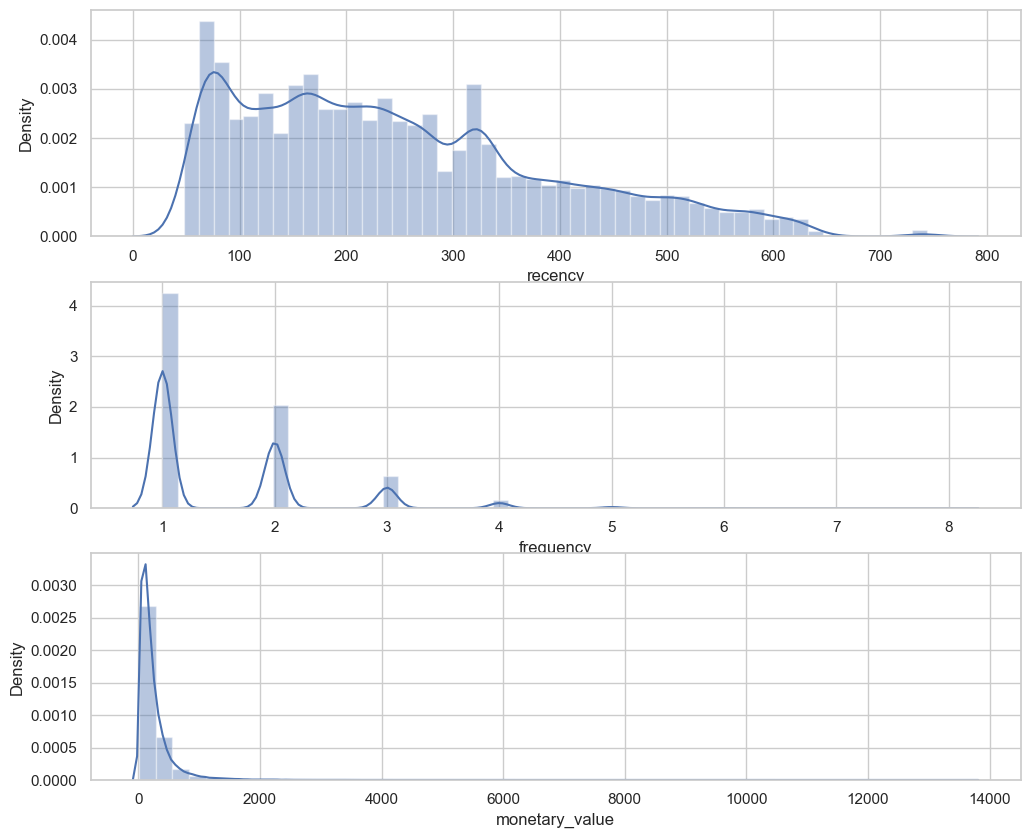

In [143]:
# visualize the distribution of the three variables
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(rfm['recency'])
plt.subplot(3, 1, 2); sns.distplot(rfm['frequency'])
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary_value'])
plt.show()

In [144]:
# apply discretization (i.e., create five categories using the qcut() function in pandas)
rfm_df=rfm
rfm_df["recency_score"]  = pd.qcut(rfm_df['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df["frequency_score"]= pd.qcut(rfm_df['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df["monetary_score"] = pd.qcut(rfm_df['monetary_value'], 5, labels=[1, 2, 3, 4, 5])

# show
rfm_df.head(2)

,customer_id,recency,frequency,monetary_value,recency_score,frequency_score,monetary_score
0,000161a058600d5901f007fab4c27140,266,1,114.33,2,1,2
1,0001fd6190edaaf884bcaf3d49edf079,445,1,84.05,1,1,2


In [145]:
# concatenate the scores to create the RFM score
rfm_df['rfm_score'] = rfm_df.apply(lambda x: str(x['recency_score']) + str(x['frequency_score']) + str(x['monetary_score']), axis=1)

# show
rfm_df.head(2)

,customer_id,recency,frequency,monetary_value,recency_score,frequency_score,monetary_score,rfm_score
0,000161a058600d5901f007fab4c27140,266,1,114.33,2,1,2,212
1,0001fd6190edaaf884bcaf3d49edf079,445,1,84.05,1,1,2,112


Based on the calculated RFM score, the customers are put into **11 segments**:

|Segment                            |Activity                                                                                                       |Actionable Tip                                                                                                                                             |
|-----------------------------------|---------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
|Champions	                        |Bought recently, order often and spend the most.	                                                            |Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.                                                |
|Loyal	                            |Orders regularly. Responsive to promotions.	                                                                |Upsell higher value products. Ask for reviews.                                                                                                             |
|Potential Loyalists	            |Recent customers who spent good amounts.	                                                                    |Offer membership / loyalty program. Keep them engaged. Offer personalized recommendations.                                                                 |
|New Customers	                    |Bought most recently.	                                                                                        |Provide on-boarding support, give them early access, start building relationship.                                                                          |
|Promising	                        |Potential loyalist a few months ago. Spends frequently and a good amount.                                      |But the last purchase was several weeks ago.	Offer coupons. Bring them back to the platform and keep them engaged. Offer personalized recommendations.   |
|Need attention	                    |Core customers whose last purchase happened more than one month ago.	                                        |Make limited time offers. Offer personalized recommendations.                                                                                              |
|About to sleep	                    |Made their last purchase a long time ago but in the last 4 weeks either visited the site or opened an email.	|Make subject lines of emails very personalized. Revive their interest by a specific discount on a specific product.                                        |
|Cannot Lose Them But Losing	    |Made the largest orders, and often. But haven’t returned for a long time.	                                    |Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalization.   |
|At Risk	                        |Similar to 'Cannot Lose Them' but with smaller monetary and frequency value.	                                |Provide helpful resources on the site. Send personalized emails.                                                                                           |
|Hibernating customers	            |Customers who made smaller and infrequent purchases before but haven't purchased anything in a long time.	    |Include them in your standard email communication but regularly check if they don't flag your content as spam. Do not overspend on this segment.           |
|Lost Customers	                    |Made last purchase long time ago and didn’t engage at all in the last 4 weeks.	                                |Revive interest with reach out campaign. Ignore otherwise.                                                                                                 |

In [146]:
# create assignment function
def assign_segment(rfm_score):

    segment = None

    if rfm_score in ['555', '554', '544', '545', '454', '455', '445']:
        segment = 'Champions'
    elif rfm_score in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']:
        segment = 'Potential Loyalist'
    elif rfm_score in ['543', '444', '435', '355', '354', '345', '344', '335']:
        segment = 'Loyal'
    elif rfm_score in ['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313']:
        segment = 'Promising'
    elif rfm_score in ['512', '511', '422', '421', '412', '411', '311']:
        segment = 'New Customers'
    elif rfm_score in ['331', '321', '312', '221', '213', '231', '241', '251']:
        segment = 'About To Sleep'
    elif rfm_score in ['535', '534', '443', '434', '343', '334', '325', '324']:
        segment = 'Need Attention'
    elif rfm_score in ['155', '154', '144', '214', '215', '115', '114', '113']:
        segment = 'Cannot Lose Them'
    elif rfm_score in ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124']:
        segment = 'At Risk'
    elif rfm_score in ['332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211']:
        segment = 'Hibernating Customers'
    elif rfm_score in ['111', '112', '121', '131', '141', '151']:
        segment = 'Lost customers'

    return segment

In [147]:
# apply assignment function
rfm_df['segment'] = rfm_df['rfm_score'].apply(lambda x: assign_segment(x))

# show
rfm_df.head(2)

,customer_id,recency,frequency,monetary_value,recency_score,frequency_score,monetary_score,rfm_score,segment
0,000161a058600d5901f007fab4c27140,266,1,114.33,2,1,2,212,Hibernating Customers
1,0001fd6190edaaf884bcaf3d49edf079,445,1,84.05,1,1,2,112,Lost customers


In [148]:
segments_df = rfm_df['segment'].value_counts(normalize=True).reset_index()
segments_df

,index,segment
0,Champions,0.145789
1,Hibernating Customers,0.132330
2,At Risk,0.128863
3,Potential Loyalist,0.121733
4,Loyal,0.094996
5,Lost customers,0.075143
6,About To Sleep,0.074587
7,Promising,0.073917
8,New Customers,0.064873
9,Need Attention,0.045315


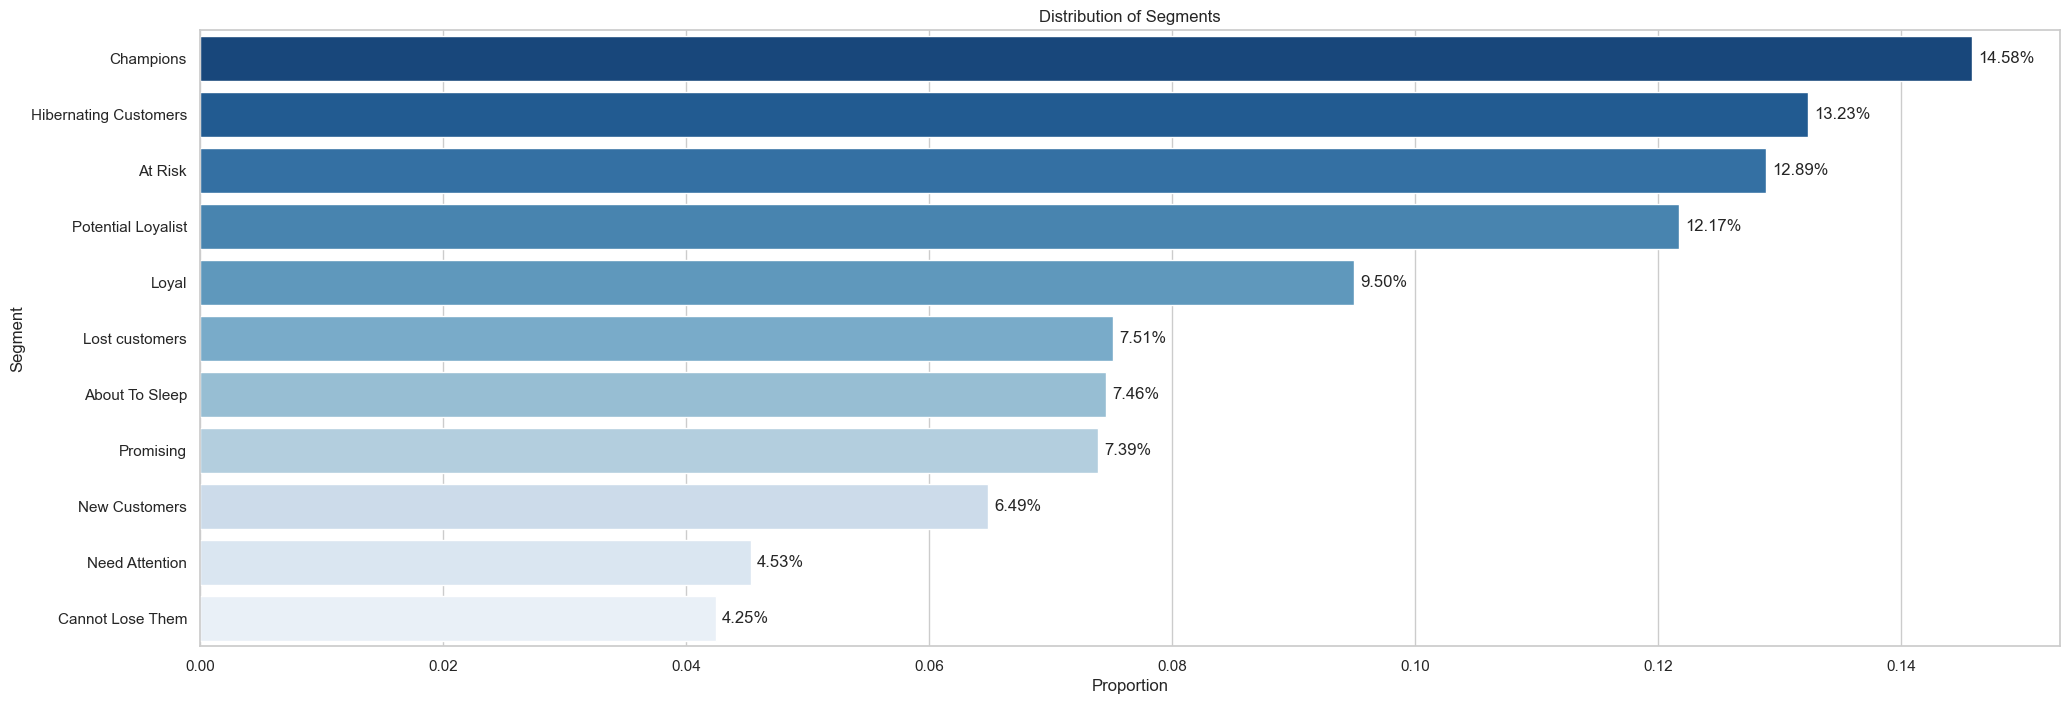

In [149]:
# get the proportion of customers in each segment
segments_df = rfm_df['segment'].value_counts(normalize=True).reset_index()

# visualize
plt.figure(figsize=(24,8))
per = sns.barplot(x=segments_df['segment'], y=segments_df['index'], palette="Blues_r", orient='h') # orient='h' to make horizontal

# add data labels next to each bar
for index, row in segments_df.iterrows():
    per.text(row['segment']+0.0005, index, f'{row["segment"]:.2%}', va='center')

# add title and axis labels
plt.title('Distribution of Segments')
plt.xlabel('Proportion')
plt.ylabel('Segment')

# show
plt.show()

In [150]:
# get an overview for each segment
rfm_stats = rfm_df[["segment", "recency", "frequency", "monetary_value"]].groupby("segment").agg(['mean','median', 'min', 'max', 'count'])

# show
rfm_stats

recency                        frequency             \
                             mean median  min  max count      mean median min   
segment                                                                         
About To Sleep         274.320982  272.0  187  372  4561  1.008770    1.0   1   
At Risk                371.989975  336.0  265  743  7880  1.705457    2.0   1   
Cannot Lose Them       437.166410  428.0  265  743  2596  1.329738    1.0   1   
Champions              108.187437  100.0   48  186  8915  2.693326    3.0   2   
Hibernating Customers  355.897553  327.0  187  743  8092  1.003460    1.0   1   
Lost customers         489.217193  481.0  373  744  4595  1.004353    1.0   1   
Loyal                  188.630057  204.0   49  264  5809  2.234980    2.0   1   
Need Attention         179.127391  188.0   49  264  2771  1.525081    2.0   1   
New Customers          147.046383  150.0   49  264  3967  1.000000    1.0   1   
Potential Loyalist     146.745298  148.0   48  264  7444  1.500672    1.0   1   
Promising              129.050442  111.0   48  264  4520  1.000000    1.0   1   

                                monetary_value                             \
                      max count           mean   median     min       max   
segment                                                                     
About To Sleep          2  4561      69.755643   57.800   13.36    203.83   
At Risk                 5  7880     354.232816  256.120   73.43   6726.66   
Cannot Lose Them        4  2596     352.281999  261.020  129.79   6929.31   
Champions               8  8915     522.778526  402.310  204.61  13714.91   
Hibernating Customers   2  8092     107.340875  102.870   15.78    204.49   
Lost customers          2  4595      59.734070   56.290   10.07    129.56   
Loyal                   7  5809     401.141935  300.590  129.65   4337.17   
Need Attention          2  2771     262.661573  204.070  129.65   4163.51   
New Customers           1  3967      68.403141   64.220   11.56    129.59   
Potential Loyalist      4  7444     122.920357  124.950    9.59    204.50   
Promising               1  4520     252.794396  178.665   13.89   3979.55   

                             
                      count  
segment                      
About To Sleep         4561  
At Risk                7880  
Cannot Lose Them       2596  
Champions              8915  
Hibernating Customers  8092  
Lost customers         4595  
Loyal                  5809  
Need Attention         2771  
New Customers          3967  
Potential Loyalist     7444  
Promising              4520

Some conclusions about the **two largest segments**:
- **Champions** are the largest segment in our customer base, and they are indeed the customers who in general buy more recently, order often and spend the most.
-  However, the second largest group are **Hiberanting Customers**, who did only make smaller and infrequent purchases before and are among the customers who haven't purchased anything in a long time.
- Etc.

An alternative to the bar chart seen above is to visulaize the proportions of each segment by using a surface. Each surface represents the proportion (in %) of each segment in the customer base. To do so, you can use the `squarify` module. (**NOTE**: make sure to install it first via !pip install squarify or !conda install squarify)

Let's apply **StandardScaler** before applying Kmeans clustering. **Why?** For multiple reasons:

**1. Sensitivity to Scale**: K-means is a distance-based clustering algorithm, that uses the Euclidean distance between data points. If the features in your dataset have different scales or units, the algorithm may become biased towards features with larger magnitudes. Features with larger scales will have a larger impact on the distance calculations, potentially dominating the clustering process. Scaling ensures that all features contribute equally to the clustering results.

**2. More Balanced Clustering**: Scaling ensures that the clustering is not dominated by features with larger ranges. This helps in creating clusters that are more balanced and representative of the data distribution, rather than being skewed by a few features with larger scales.

**3. Handling Outliers**: Scaling can also help in mitigating the impact of outliers. Outliers can greatly affect the performance of K-means, and scaling can make the algorithm more robust to extreme values.

In [151]:
# only select rfm variables
rfm_kmeans_df = rfm_df[['recency', 'frequency', 'monetary_value']]

# show
rfm_kmeans_df.head()

,recency,frequency,monetary_value
0,266,1,114.33
1,445,1,84.05
2,441,1,25.85
3,165,1,247.22
4,283,1,310.65


In [152]:
# initialize scaler
scaler = StandardScaler()

# fit
scaler.fit(rfm_kmeans_df[['recency', 'frequency', 'monetary_value']])

# transform and convert into a dataframe
rfm_kmeans_df[['recency', 'frequency', 'monetary_value']] = scaler.transform(rfm_kmeans_df[['recency', 'frequency', 'monetary_value']])

# show
rfm_kmeans_df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\1142189963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_kmeans_df[['recency', 'frequency', 'monetary_value']] = scaler.transform(rfm_kmeans_df[['recency', 'frequency', 'monetary_value']])


,recency,frequency,monetary_value
0,0.113576,-0.697211,-0.446612
1,1.350498,-0.697211,-0.547172
2,1.322857,-0.697211,-0.740456
3,-0.584352,-0.697211,-0.005282
4,0.231049,-0.697211,0.205370


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

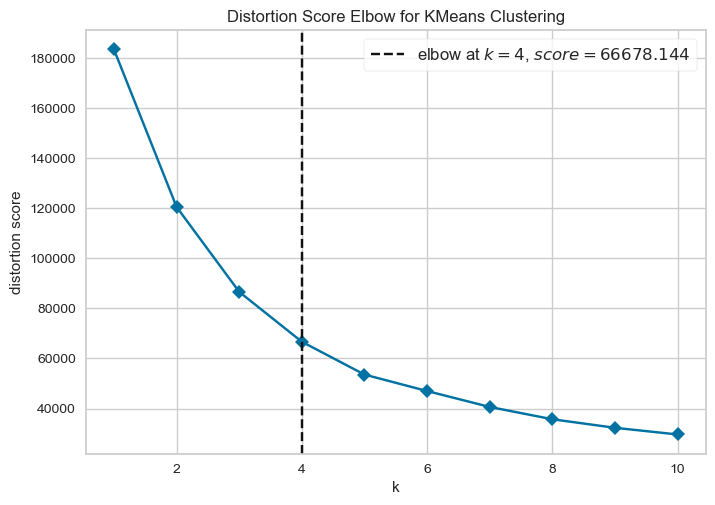

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
from yellowbrick.cluster import KElbowVisualizer
#Elbow curve
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(rfm_kmeans_df)        
visualizer.show()   

In [154]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(rfm_kmeans_df)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(rfm_kmeans_df) )
centroid_df

,recency,frequency,monetary_value
0,-0.487853,-0.697211,-0.358882
1,-0.541984,1.021811,0.199873
2,-0.381495,1.080433,3.619410
3,1.292231,-0.567553,-0.315875


In [155]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [156]:
df_kmeans = rfm_kmeans_df.copy()
df_kmeans['labels'] = df_labels['labels'].values

In [157]:
df_kmeans.head(2)

,recency,frequency,monetary_value,labels
0,0.113576,-0.697211,-0.446612,0
1,1.350498,-0.697211,-0.547172,3


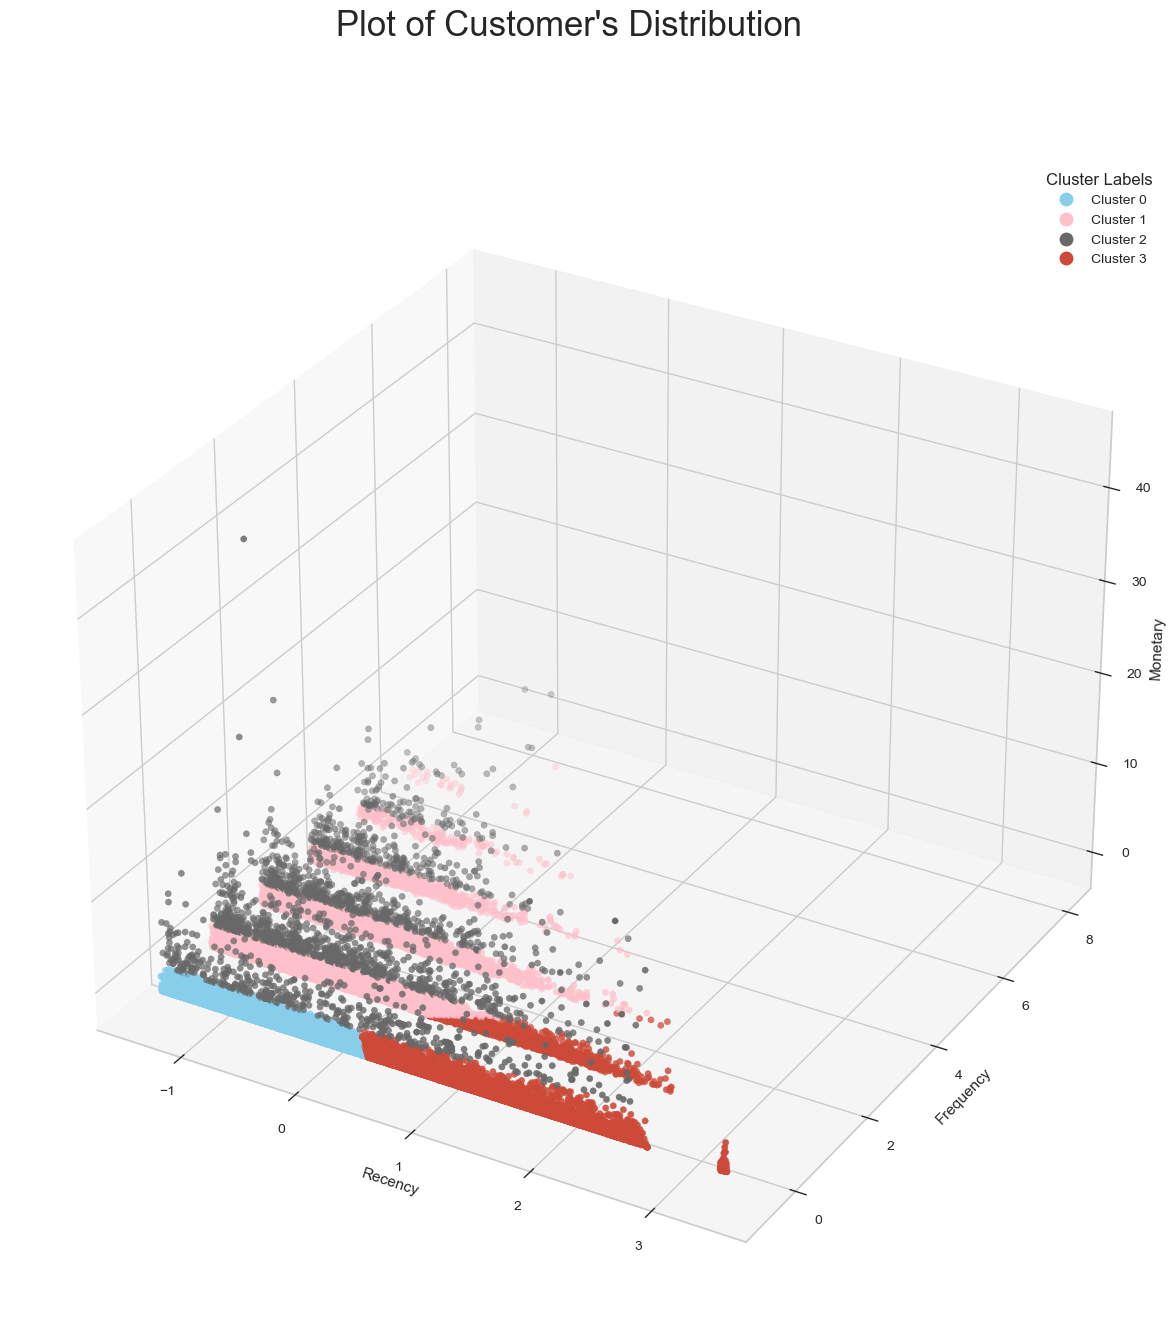

In [158]:
colors = np.array(["skyblue", "pink", "#686868", "#cd4a38"])

fig = plt.figure(figsize=(15, 15))
fig.suptitle("Plot of Customer's Distribution", fontsize=25)

ax = fig.add_subplot(111, projection='3d')
labels = df_kmeans["labels"].tolist()

scatter = ax.scatter3D(df_kmeans["recency"], df_kmeans["frequency"], df_kmeans["monetary_value"], marker='o', c=colors[labels])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Create a legend with labels for each cluster
legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]  # Replace with your actual cluster labels

# Create a legend using proxy artists to associate colors with labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]

ax.legend(handles=legend_handles, title="Cluster Labels")

plt.show()


In [159]:
overview_df = rfm_kmeans_df.groupby(['cluster']).agg({
            'recency'  : ['mean','median', 'min', 'max'],
            'frequency': ['mean','median', 'min', 'max'],
            'monetary_value' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

# show
overview_df

KeyError: 'cluster'

### question number tewlve (How does the delivery time vary based on factors such as product category, seller location, and customer location?)  <a class="anchor" id="q12"></a>
    

In [ ]:
# Merge dataframes to include product category, seller location, and customer location
new_sellers=sellers
new_sellers.rename(columns={'city_name': 'seller_city_name'}, inplace=True)
new_customers=customers
new_customers.rename(columns={'city_name': 'customer_city_name'}, inplace=True)
df = pd.merge(orders, order_items, on='order_id', how='inner')
df = pd.merge(df, products, on='product_id', how='inner')
df = pd.merge(df, new_sellers, on='seller_id', how='inner')
df = pd.merge(df, new_customers, on='customer_id', how='inner')
df.head(2)

In [ ]:
df['purchasing'] = df['order_purchase_timestamp']
df['delivered'] = df['order_delivered_customer_date']
df['estimated'] = df['order_estimated_delivery_date']
df['time_to_delivery'] = np.busday_count(df['purchasing'].values.astype('datetime64[D]'), df['delivered'].values.astype('datetime64[D]'))


In [ ]:
# Grouping data by product category
product_avg_grouped = df.groupby(by='product_category_name', as_index=False).mean(numeric_only=True)
product_time_to_delivery = product_avg_grouped.loc[:, ['product_category_name', 'time_to_delivery']]

# Grouping data by seller location
seller_avg_grouped = df.groupby(by='seller_city_name', as_index=False).mean(numeric_only=True)
seller_time_to_delivery = seller_avg_grouped.loc[:, ['seller_city_name', 'time_to_delivery']]

# Grouping data by customer location
customer_avg_grouped = df.groupby(by='customer_city_name', as_index=False).mean(numeric_only=True)
customer_time_to_delivery = customer_avg_grouped.loc[:, ['customer_city_name', 'time_to_delivery']]

In [ ]:
# Sort data
product_time_to_delivery = product_time_to_delivery.sort_values(by='time_to_delivery', ascending=False)
seller_time_to_delivery = seller_time_to_delivery.sort_values(by='time_to_delivery', ascending=False)
customer_time_to_delivery = customer_time_to_delivery.sort_values(by='time_to_delivery', ascending=False)

In [ ]:
fig, axs = plt.subplots(1,2 , figsize=(15, 5))

# Plot Pack 01 - Time to delivery based on product category
sns.barplot(x='time_to_delivery', y='product_category_name', data=product_time_to_delivery.head(), ax=axs[0], palette='pink')
axs[0].set_title('Top 5 Product Categories with Longest \nAverage Time to Delivery', size=12, color='black')
axs[0].set_xlabel('Time to Delivery')
axs[0].set_xlim(0, product_time_to_delivery['time_to_delivery'].max())
axs[0].set_ylabel('Product Category')

sns.barplot(x='time_to_delivery', y='product_category_name', data=product_time_to_delivery.tail(), ax=axs[1], palette='Blues')
axs[1].set_title('Top 5 Product Categories with Shortest \nAverage Time to Delivery', size=12, color='black')
axs[1].set_xlabel('Time to Delivery')
axs[1].set_xlim(0, product_time_to_delivery['time_to_delivery'].max())
axs[1].set_ylabel('')


plt.suptitle(' Delivery Time Based on Product Category', size=16)
plt.tight_layout()
plt.show()


In [ ]:
# Plot Pack 02 - Time to delivery based on seller location
fig, axs = plt.subplots(1,2 , figsize=(15, 5))

# Plot Pack 02 - Time to delivery based on seller location
sns.barplot(x='time_to_delivery', y='seller_city_name', data=seller_time_to_delivery.head(), ax=axs[0], palette='pink')
axs[0].set_title('Top 5 Seller Locations with Longest \nAverage Time to Delivery', size=12, color='black')
axs[0].set_xlabel('Time to Delivery')
axs[0].set_xlim(0, seller_time_to_delivery['time_to_delivery'].max())
axs[0].set_ylabel('Seller Location')

sns.barplot(x='time_to_delivery', y='seller_city_name', data=seller_time_to_delivery.tail(), ax=axs[1], palette='Blues')
axs[1].set_title('Top 5 Seller Locations with shortest \nAverage Time to Delivery', size=12, color='black')
axs[1].set_xlabel('Time to Delivery')
axs[1].set_xlim(0, seller_time_to_delivery['time_to_delivery'].max())
axs[1].set_ylabel('Seller Location')


plt.suptitle(' Delivery Time Based on seller location', size=16)
plt.tight_layout()
plt.show()


In [ ]:
# Plot Pack 03 - Time to delivery based on customer location
fig, axs = plt.subplots(1,2 , figsize=(15, 5))

sns.barplot(x='time_to_delivery', y='customer_city_name', data=customer_time_to_delivery.head(), ax=axs[0], palette='pink')
axs[0].set_title('Top 5 Customer Locations with Longest \nAverage Time to Delivery', size=12, color='black')
axs[0].set_xlabel('Time to Delivery')
axs[0].set_xlim(0, customer_time_to_delivery['time_to_delivery'].max())
axs[0].set_ylabel('Customer Location')

sns.barplot(x='time_to_delivery', y='customer_city_name', data=customer_time_to_delivery.tail(), ax=axs[1], palette='Blues')
axs[1].set_title('Top 5 Customer Locations with shortest \nAverage Time to Delivery', size=12, color='black')
axs[1].set_xlabel('Time to Delivery')
axs[1].set_xlim(0, customer_time_to_delivery['time_to_delivery'].max())
axs[1].set_ylabel('Customer Location')


plt.suptitle(' Delivery Time Based on customer location', size=16)
plt.tight_layout()
plt.show()


# ------------------------------------------------------------------------------------------------------


## for persentation <a class="anchor" id="p"></a>

In [ ]:
customers['birthday'] = pd.to_datetime(customers['birthday'])
customers['birthday'] =customers['birthday'].dt.year
customers['Generation'] =customers['birthday'].apply(categorize_generation)
customers.head()

In [ ]:
# Group by 'Generation' and 'gender' and count the customers
grouped = customers.groupby(['Generation', 'gender'])['customer_id'].count().reset_index()

# Rename the count column
grouped = grouped.rename(columns={'customer_id': 'Customer Count'})

# Print the result
print(grouped)


In [ ]:

data = {
    'Generation': ['Silent Generation','Baby Boomers', 'Generation X', 'Generation Y (Millennials)', 'Generation Z'],
    'Female': [10968, 12850,11103,11034,5444],
    'Male': [-10241, -12099, -10277, -10410, -5015]
}
GenClass = ['Silent Generation','Baby Boomers', 'Generation X', 'Generation Y (Millennials)', 'Generation Z']

# Create a DataFrame
df = pd.DataFrame(data)
bar_plot = sns.barplot(x='Male', y='Generation', data=df, order=GenClass, lw=0, palette="Blues_d")
bar_plot = sns.barplot(x='Female', y='Generation', data=df, order=GenClass, lw=0, palette="pink")
plt.title("Pyramid Generation Distribution of Genders", fontsize=22)
plt.xlabel("Male/Female")

In [ ]:

data = {
    'Generation': ['Silent Generation','Baby Boomers', 'Generation X', 'Generation Y (Millennials)', 'Generation Z'],
    'Female': [10968, 12850,11103,11034,5444],
    'Male': [-10241, -12099, -10277, -10410, -5015]
}
GenClass = ['Silent Generation','Baby Boomers', 'Generation X', 'Generation Y (Millennials)', 'Generation Z']

# Create a DataFrame
df = pd.DataFrame(data)
bar_plot = sns.barplot(x='Male', y='Generation', data=df, order=GenClass, lw=0, palette="Blues_d")
bar_plot = sns.barplot(x='Female', y='Generation', data=df, order=GenClass, lw=0, palette="pink")
plt.title("Pyramid Generation Distribution of Genders", fontsize=22)
plt.xlabel("Male/Female")

In [ ]:
customers_with_age_group=customers
# Define the age groups
age_groups = ['0-18','19-24','25-29', '30-34', '35-39', '40-44', '45-49',
              '50-54', '55-59','60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

# Create a function to calculate the age group
def calculate_age_group(year_of_birth):
    current_year = 2023  # Update with the current year
    age = current_year - year_of_birth
    for i, age_range in enumerate(age_groups):
        start_age, end_age = map(int, age_range.split('-'))
        if start_age <= age <= end_age:
            return age_range
    return 'Unknown'

# Apply the function to create the "age_group" column
customers_with_age_group['age_group'] = customers_with_age_group['birthday'].apply(calculate_age_group)

# Create separate columns for male and female
customers_with_age_group['female'] = (customers_with_age_group['gender'] == 'F').astype(int)
customers_with_age_group['male'] = (customers_with_age_group['gender'] == 'M').astype(int)

# keep three columns 
customers_with_age_group = customers_with_age_group[['female', 'male', 'age_group']]
customers_with_age_group

In [ ]:
# Calculate female and male counts separately
female_counts = customers_with_age_group[customers_with_age_group['female'] == 1]['age_group'].value_counts().reset_index()
male_counts = customers_with_age_group[customers_with_age_group['male'] == 1]['age_group'].value_counts().reset_index()
# Merge the female and male counts on the 'age_group' column
merged_counts = female_counts.merge(male_counts, on='index', how='outer')
merged_counts.columns = ['age_group', 'female', 'male']

# Fill missing values with 0
merged_counts = merged_counts.fillna(0)

# Sort the DataFrame by the 'age_group' column
merged_counts = merged_counts.sort_values(by='age_group')
merged_counts['male']=merged_counts['male']*-1
merged_counts

In [ ]:
AgeClass =['0-18', '19-24', '25-29', '30-34', '35-39', '40-44', '45-49',
              '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

# Create a DataFrame
df = merged_counts
bar_plot = sns.barplot(x='male', y='age_group', data=merged_counts, order=AgeClass, lw=0, palette="Blues_d")
bar_plot = sns.barplot(x='female', y='age_group', data=merged_counts, order=AgeClass, lw=0, palette="pink")
plt.title("Pyramid age Distribution of Genders", fontsize=22)
plt.xlabel("Male/Female")

In [ ]:
customers.head(2)

In [ ]:
# Calculating working days between purchasing, delivering and estimated delivery
df=orders
df['purchasing'] = orders['order_purchase_timestamp']
df['delivered'] = orders['order_delivered_customer_date']
df['estimated'] = orders['order_estimated_delivery_date']
df['time_to_delivery'] = np.busday_count(df['purchasing'].values.astype('datetime64[D]'), df['delivered'].values.astype('datetime64[D]'))
df['diff_estimated_delivery'] = np.busday_count(df['estimated'].values.astype('datetime64[D]'),df['delivered'].values.astype('datetime64[D]') )
df=pd.merge(df,customers,on='customer_id',how='inner')
df=pd.merge(df,order_items,on='order_id',how='inner')
# Grouping data by state
city_avg_grouped = df.groupby(by='customer_city_name', as_index=False).mean(numeric_only=True)
city_freight_paid = city_avg_grouped.loc[:, ['customer_city_name', 'freight_value']]
city_time_to_delivery = city_avg_grouped.loc[:, ['customer_city_name', 'time_to_delivery']]
city_estimated_delivery = city_avg_grouped.loc[:, ['customer_city_name', 'diff_estimated_delivery']]
# Sorting data
city_freight_paid = city_freight_paid.sort_values(by='freight_value', ascending=False)      
city_time_to_delivery = city_time_to_delivery.sort_values(by='time_to_delivery', ascending=False)
city_estimated_delivery = city_estimated_delivery.sort_values(by='diff_estimated_delivery')

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Plot Pack 01 - Freight value paid on states
sns.barplot(x='freight_value', y='customer_city_name', data=city_freight_paid.head(), ax=axs[1, 0], palette='pink')
axs[1, 0].set_title('Top 5 city with Highest \nAverage Freight Value', size=12, color='black')
sns.barplot(x='freight_value', y='customer_city_name', data=city_freight_paid.tail(), ax=axs[2, 0], palette='Blues')
axs[2, 0].set_title('Top 5 city with Lowest \nAverage Freight Value', size=12, color='black')
for ax in axs[1, 0], axs[2, 0]:
    ax.set_xlabel('Mean Freight Value')
    ax.set_xlim(0, city_freight_paid['freight_value'].max())
    #format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 0].text(0.50, 0.30, f'€{round(df.freight_value.mean(), 2)}', fontsize=45, ha='center')
axs[0, 0].text(0.50, 0.12, 'is the mean value of freight paid', fontsize=12, ha='center')
axs[0, 0].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 0].axis('off')

# Plot Pack 02 - Time to delivery on states
sns.barplot(x='time_to_delivery', y='customer_city_name', data=city_time_to_delivery.head(), ax=axs[1, 1], palette='pink')
axs[1, 1].set_title('Top 5 city with Highest \nAverage Time to Delivery', size=12, color='black')
sns.barplot(x='time_to_delivery', y='customer_city_name', data=city_time_to_delivery.tail(), ax=axs[2, 1], palette='Blues')
axs[2, 1].set_title('Top 5 city with Lowest \nAverage Time do Delivery', size=12, color='black')
for ax in axs[1, 1], axs[2, 1]:
    ax.set_xlabel('Time to Delivery')
    ax.set_xlim(0, city_time_to_delivery['time_to_delivery'].max())
    #format_spines(ax, right_border=False)
    ax.set_ylabel('')
    
# Annotations
axs[0, 1].text(0.40, 0.30, f'{int(df.time_to_delivery.mean())}', fontsize=45, ha='center')
axs[0, 1].text(0.60, 0.30, 'working days', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.12, 'is the average delay for delivery', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 1].axis('off')
    
# Plot Pack 03 - Differnece between delivered and estimated on states
sns.barplot(x='diff_estimated_delivery', y='customer_city_name', data=city_estimated_delivery.head(), ax=axs[1, 2], palette='Blues')
axs[1, 2].set_title('Top 5 city where Delivery is \nReally Fast Comparing to Estimated', size=12, color='black')
sns.barplot(x='diff_estimated_delivery', y='customer_city_name', data=city_estimated_delivery.tail(), ax=axs[2, 2], palette='pink')
axs[2, 2].set_title('Top 5 city where Delivery is \nNot So Fast Comparing to Estimated', size=12, color='black')
for ax in axs[1, 2], axs[2, 2]:
    ax.set_xlabel('Days Between Delivery and Estimated')
    ax.set_xlim(city_estimated_delivery['diff_estimated_delivery'].min()-1, 
                city_estimated_delivery['diff_estimated_delivery'].max()+1)
    #format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 2].text(0.40, 0.30, f'{int(df.diff_estimated_delivery.mean())}', fontsize=45, ha='center')
axs[0, 2].text(0.60, 0.30, 'working days', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.12, 'is the average difference between', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.00, 'delivery and estimated date', fontsize=12, ha='center')
axs[0, 2].axis('off') 
    
plt.suptitle('Comparative Study: E-Commerce on different cities', size=16)
plt.tight_layout()
plt.show()

sale over time

In [ ]:
# create a new column year
orders['year'] = orders['order_purchase_timestamp'].dt.to_period('Y')

# group the data by year and count the number of orders placed per month
year_sales = orders.groupby('year')['order_id'].count()

# convert the index (Year) to strings for compatibility with plt.bar()
year_sales.index = year_sales.index.astype(str)


In [ ]:
plt.figure(figsize=(20, 6))

# Create a scatter plot
plt.bar(year_sales.index, year_sales, color='skyblue', label='Sales Volume')

# Sort the data by index for connecting the dots with lines
sorted_data = year_sales.sort_index()

# Create a line plot to connect the dots
plt.plot(sorted_data.index, sorted_data, color='skyblue', marker='x', linestyle='dashed', label='Line Plot')

plt.title('Sales Volume (per year)')
plt.xlabel('year')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines to the plot
plt.legend()  #


In [ ]:
# create a new column month
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

# group the data by month and count the number of orders placed per month
monthly_sales = orders.groupby('month_year')['order_id'].count()

# convert the index (Month-Year) to strings for compatibility with plt.bar()
monthly_sales.index = monthly_sales.index.astype(str)

In [ ]:
plt.figure(figsize=(20, 6))

# Create a scatter plot
plt.bar(monthly_sales.index, monthly_sales, color='skyblue', label='Sales Volume')

# Sort the data by index for connecting the dots with lines
sorted_data = monthly_sales.sort_index()

# Create a line plot to connect the dots
plt.plot(sorted_data.index, sorted_data, color='skyblue', marker='x', linestyle='dashed', label='Line Plot')

plt.title(' Sales Volume (per Month)')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines to the plot
plt.legend()  #


top 5 seller

--------------------------------------------------------------------------------------------------------------------------------------

review:

In [ ]:
order_reviews.head(2)

In [ ]:
unique_order_count = order_reviews['language'].unique()
unique_order_count

In [ ]:
language_counts = order_reviews['language'].value_counts()
proportions = language_counts*100 / len(order_reviews)

print(proportions)


In [ ]:
nan_percentage = (order_reviews['language'].isna().sum() / len(order_reviews)) * 100
print(f'Percentage of NaN values in the "language" column: {nan_percentage:.2f}%')


In [ ]:
# Calculate the language value counts and NaN percentage
language_counts = order_reviews['language'].value_counts()
nan_percentage = (order_reviews['language'].isna().sum() / len(order_reviews)) * 100

# Data for the pie chart
labels = language_counts.index.tolist() + ['NaN']
sizes = language_counts.tolist() + [nan_percentage]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightblue', 'lightgray']

# Create the first pie chart for language values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Language Proportions')

# Create the second pie chart for NaN percentage
plt.subplot(122)
plt.pie([nan_percentage, 100 - nan_percentage], labels=['NaN', 'Non-NaN'], colors=['pink', 'lightblue'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('NaN Percentage')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate the language value counts and NaN percentage
language_counts = order_reviews['language'].value_counts()
nan_percentage = (order_reviews['language'].isna().sum() / len(order_reviews)) * 100

# Data for the outer pie chart (language proportions)
labels_outer = language_counts.index.tolist()
sizes_outer = language_counts.tolist()
colors_outer = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightblue']

# Data for the inner pie chart (NaN percentage)
labels_inner = ['NaN', 'Non-NaN']
sizes_inner = [nan_percentage, 100 - nan_percentage]
colors_inner = ['pink', 'lightblue']

# Create the figure and outer pie
fig, ax = plt.subplots()
ax.axis('equal')

# Outer pie chart
wedges_outer, texts_outer, autotexts_outer = ax.pie(
    sizes_outer,
    labels=labels_outer,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_outer,
    radius=1.0,
    wedgeprops={'width': 0.4, 'edgecolor': 'w'}
)

# Inner pie chart
wedges_inner, texts_inner, autotexts_inner = ax.pie(
    sizes_inner,
    labels=labels_inner,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_inner,
    radius=0.6,
    wedgeprops={'width': 0.4, 'edgecolor': 'w'}
)

# Set the center circle for the donut chart
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(centre_circle)

# Set properties for outer pie chart labels
for text in texts_outer:
    text.set(fontsize=12)
for autotext in autotexts_outer:
    autotext.set(fontsize=12, fontweight='bold')

# Set properties for inner pie chart labels
for text in texts_inner:
    text.set(fontsize=7)
for autotext in autotexts_inner:
    autotext.set(fontsize=12, fontweight='bold')

plt.title('Donut Chart: Language Proportions and NaN Percentage')
plt.show()


In [ ]:
convert_str_to_datetime(order_reviews,'review_creation_date')
convert_str_to_datetime(order_reviews,'review_answer_timestamp')

In [ ]:
# Now Lets split 'date' column into day, month, and year into separate columns
new_order_reviews=order_reviews
new_order_reviews['day'] = new_order_reviews['review_creation_date'].dt.day
new_order_reviews['month'] = new_order_reviews['review_creation_date'].dt.month
new_order_reviews['year'] = new_order_reviews['review_creation_date'].dt.year

In [ ]:
comment=new_order_reviews[new_order_reviews['language'].notnull()]
comment.head(2)

In [ ]:
len(comment)

In [ ]:
reviews_by_year = comment['year'].value_counts().sort_index()
x = reviews_by_year.index
y = reviews_by_year.values

fig, ax = plt.subplots()
ax.bar(x, y, color='skyblue')  # Use 'bar' instead of 'plot'
plt.plot(x, y, color='skyblue', marker='x', linestyle='dashed', label='Line Plot')
plt.title("Number of Reviews Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")

# Customize x-axis ticks
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
sns.histplot(data=order_reviews, x="review_score", discrete=True, kde=True, color="skyblue")
plt.title("Distribution of score Ratings")
plt.xlabel("score Rating")
plt.ylabel("Count")

plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

# Create a cumulative histogram with percentages
sns.histplot(data=order_reviews, x="review_score", discrete=True, kde=True, cumulative=True, stat="percent", color="skyblue")

plt.title("Cumulative Distribution of Score Ratings (Percentage)")
plt.xlabel("Score Rating")
plt.ylabel("Cumulative Percentage")
plt.grid(True)

plt.show()


In [ ]:
merge_review=pd.merge(order_items,products,on='product_id', how='inner')
merge_review=pd.merge(merge_review,order_reviews,on='order_id', how='inner')

In [ ]:
top_5_score_cat = merge_review[merge_review['review_score'] == 5]['product_category_name'].value_counts().nlargest(5).index

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=merge_review[merge_review['product_category_name'].isin(top_5_score_cat)], x="product_category_name", palette="Blues")
ax.set_title("Top 5 category with 5-score Ratings")
ax.set_xlabel("product_category_name")
ax.set_ylabel("Number of 5_review_score Reviews")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.legend(title='review_score', labels=['5_review_score'])

plt.show()

In [ ]:
bottom_5_score_cat = merge_review[merge_review['review_score'] == 1]['product_category_name'].value_counts().nsmallest(5).index

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=merge_review[merge_review['product_category_name'].isin(bottom_5_score_cat)], x="product_category_name", palette="pink")
ax.set_title("Bottom 5 category with 1-Score Ratings")
ax.set_xlabel("product_category_name")
ax.set_ylabel("Number of 1_review_score Reviews")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.legend(title='review_score', labels=['1_review_score'])

plt.show()

### word cloud

In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-uncased")

# First let's define a function to clean and preprocess text
def clean_and_tokenize(text):
    # Here tokenizing the text using BERT tokenizer
    tokens = tokenizer.tokenize(text)

    # This converts tokens back to text
    cleaned_text = " ".join(tokens)

    # This removes special characters and punctuation
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    
    # This converts text to 
    cleaned_text = cleaned_text.lower()

    return cleaned_text

In [ ]:
all_cleaned_text = " ".join(order_reviews['review_comment_message'].dropna())
all_cleaned_text = re.sub(r'\b(product|produit|Ik|le|je|Je|ik|heb)\b', '', all_cleaned_text)

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Customer Reviews")
plt.show()

In [ ]:
def get_sentiment(score):
    if score > 3:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

# Creating new column 'sentiment'
order_reviews['sentiment'] = order_reviews['review_score'].apply(get_sentiment)



In [ ]:
Positive_sentiment=order_reviews[order_reviews['sentiment']==1]
Negative_sentiment=order_reviews[order_reviews['sentiment']==0]

In [ ]:
#posetive
all_cleaned_posetive_text = " ".join(Positive_sentiment['review_comment_message'].dropna())
all_cleaned_posetive_text = re.sub(r'\b(product|produit|Ik|le|je|Je|ik|heb)\b', '',all_cleaned_posetive_text)
wordcloud = WordCloud(width=800, height=400, background_color="white",colormap='Blues').generate(all_cleaned_posetive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Customer Reviews")
plt.show()

In [ ]:
#negetive
all_cleaned_Negative_text = " ".join(Negative_sentiment['review_comment_message'].dropna())
all_cleaned_Negative_text = re.sub(r'\b(product|produit|Ik|le|je|Je|ik|heb)\b', '',all_cleaned_Negative_text)
wordcloud = WordCloud(width=800, height=400, background_color="white",colormap='pink').generate(all_cleaned_Negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Customer Reviews")
plt.show()

In [ ]:
order_reviews.head(2)
df=order_reviews
df=pd.merge(orders,df,how='inner',on='order_id')
df=pd.merge(order_items,df,how='inner',on='order_id')
df=pd.merge(products,df,how='inner',on='product_id')
df=df[['order_id','sentiment','customer_id','time_to_delivery','product_category_name','product_name_length','product_description_length','product_photos_qty']]
df.head(2)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into features (X) and target (y)
X = df[['time_to_delivery','product_name_length','product_description_length','product_photos_qty']]
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model using scikit-learn
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the model using scikit-learn metrics (e.g., accuracy, precision, recall)

# Fit a logistic regression model using statsmodels
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# View the summary to examine coefficients and p-values
print(result.summary())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df=df[['sentiment','time_to_delivery','product_name_length','product_description_length','product_photos_qty']]
# Create a correlation matrix
correlation_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract 'sentiment' and 'time_to_delivery' columns from your DataFrame (replace 'df' with your DataFrame name)
sentiment = df['sentiment']
time_to_delivery = df['time_to_delivery']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(time_to_delivery, sentiment, alpha=0.5, color='blue')
plt.title('Scatter Plot of Sentiment vs. Time to Delivery')
plt.xlabel('Time to Delivery')
plt.ylabel('Sentiment (0: Negative, 1: Positive)')
plt.show()


In [ ]:
# calculate differences in days
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_approved_at']).dt.total_seconds() / 86400
orders['estimated_delivery_time'] = (orders['order_estimated_delivery_date'] - orders['order_approved_at']).dt.total_seconds() / 86400

In [ ]:
# define data and labels
data = [orders['delivery_time'], orders['estimated_delivery_time']]
labels = ['Delivery time', 'Estimated delivery time']

# create a figure
plt.figure(figsize=(10, 4))

# loop through data and labels to create KDE plots with cycling colors
for data_series, label in zip(data, labels):
    sns.kdeplot(data_series, label=label, fill=True, common_norm=False, alpha=0.5, linewidth=0, cmap='Blues')

plt.title("Delivery time in days")
plt.xlabel("Delivery Time")
plt.legend()
plt.show()

In [ ]:
orders.head()

In [ ]:
df=pd.merge(orders,order_items,how='inner',on='order_id')
df=df[['order_id','order_delivered_carrier_date','shipping_limit_date']]
df['on_time_delivery'] = (df['order_delivered_carrier_date'] < df['shipping_limit_date']).astype(int)
df.head(2)

In [ ]:
on_time_counts = df['on_time_delivery'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(on_time_counts, labels=['On-Time', 'Late'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribution of On-Time vs. Late Deliveries')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


In [ ]:
df=pd.merge(orders,order_items,how='inner',on='order_id')
df=df[['order_id','seller_id','order_delivered_carrier_date','shipping_limit_date']]
df['delay_delivery'] = (df['order_delivered_carrier_date'] < df['shipping_limit_date']).astype(int)
df.head(2)

In [ ]:
df=df.groupby('seller_id')['delay_delivery'].sum() 
df=df.to_frame()


In [ ]:
df=df.sort_values(by='delay_delivery', ascending=False)
df.head(2)

In [ ]:
# Calculate the cumulative percentage of delays caused by each seller
df['Cumulative Percentage'] = df['delay_delivery'].cumsum() / df['delay_delivery'].sum()


In [ ]:
df

In [ ]:
# Create a dictionary to store the number of customers for each i value
num_customers_dict = {}

# Create DataFrames for different values of i and count the number of selected sellers
for i in range(1, 11):  # This loop will run from 1 to 10
    i_value = i / 10.0  # Convert i to a decimal value between 0.1 and 1
    selected_sellers = df[df['Cumulative Percentage'] <= i_value]
    num_customers = len(selected_sellers)
    num_customers_dict[i_value] = num_customers

# Now, num_customers_dict contains the number of customers for different values of i between 0.1 and 1
# You can access and work with these counts as needed
for i, num_customers in num_customers_dict.items():
    print(f'For i = {i}, the number of customers causing {i * 100}% of delays is {num_customers}')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
# Create a dictionary to store the number of customers for each i value
num_customers_dict = {}

# Create DataFrames for different values of i and count the number of selected sellers
for i in range(1, 10):  # This loop will run from 1 to 9
    i_value = i / 10.0  # Convert i to a decimal value between 0.1 and 0.9
    selected_sellers = df[df['Cumulative Percentage'] <= i_value]
    num_customers = len(selected_sellers)
    num_customers_dict[i_value] = num_customers

# Extract the values from the dictionary for plotting
i_values = list(num_customers_dict.keys())
customer_counts = list(num_customers_dict.values())

# Create a scatter plot with 'skyblue' color
plt.scatter(i_values, customer_counts, color='skyblue', label='Scatter Points')
plt.plot(i_values, customer_counts, linestyle='-', marker='o', color='skyblue')
plt.xlabel('i (Percentage of Delays)')
plt.ylabel('Number of sellers')
plt.title('Number of sellers vs. i (Percentage of Delays)')
plt.legend()
plt.show()


## customer behaviour

## when

In [ ]:
df=orders
df['hour']=df['order_purchase_timestamp'].dt.hour
trend_hour=df.groupby('hour').agg({'order_id':'count'}).rename(columns={'order_id':'freq_order'}).reset_index()

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x=trend_hour['hour'],y=trend_hour['freq_order'],color="skyblue")
plt.title("Frequency of transaction over the hour")
plt.xlabel("Hour of the day")
plt.ylabel('Order Count')
plt.show()

In [ ]:
df['weekday'] = df['order_purchase_timestamp'].dt.weekday
df['day_of_month']=df['order_purchase_timestamp'].dt.day
df.head(2)

In [ ]:
trend_day=df.groupby('day_of_month').agg({'order_id':'count'}).rename(columns={'order_id':'freq_order'}).reset_index()

In [ ]:
trend_day[trend_day['day_of_month']==29]

In [ ]:

x=trend_day['day_of_month']
y=trend_day['freq_order']
fig, ax = plt.subplots()
ax.bar(x, y, color='skyblue')  # Use 'bar' instead of 'plot'
plt.plot(x, y, color='skyblue', marker='x', linestyle='dashed', label='Line Plot')
plt.title("Frequency of transaction over the days")
plt.xlabel("day of the month")
plt.ylabel('Order Count')
plt.show()

In [ ]:
df=orders
df['weekday'] = df['order_purchase_timestamp'].dt.weekday
day_hour=orders.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()
weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
day_hour.weekday=day_hour.weekday.map(weekmap)
day_hour.head()

In [ ]:
### Sorting it so that the plot order is correct.
day_hour['weekday']=pd.Categorical(day_hour['weekday'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)

In [ ]:
day_hour=day_hour.pivot('weekday','hour','freq')
day_hour

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(day_hour,annot=True,fmt="d",cmap="Blues")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of tranactions over the hour by day",size=10)

## payment

In [ ]:
df_orders_pay=pd.merge(order_payments,orders,on='order_id',how='inner')

In [ ]:
# Plot 1 - Payment types in a pie chart
fig = plt.figure(constrained_layout=True, figsize=(15, 12))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
data = df_orders_pay['payment_type'].value_counts()
ax1.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues"))
ax1.set_title('Payment Types Distribution')
# Show the plots
plt.show()

In [ ]:
# Plot 2 - Payment installments
fig = plt.figure(constrained_layout=True, figsize=(15, 12))
gs = GridSpec(2, 2, figure=fig)
ax2 = fig.add_subplot(gs[0, 0])
sns.histplot(data=df_orders_pay, x="payment_installments", discrete=True, kde=True, color="skyblue", ax=ax2)
ax2.set_title('Payment Installments Distribution')
# Show the plots
plt.show()

In [ ]:
# Plot 3 - Evolution of payment types
fig = plt.figure(constrained_layout=True, figsize=(25, 15))
gs = GridSpec(2, 2, figure=fig)
ax3 = fig.add_subplot(gs[0, 0])
df_orders_pay['order_purchase_year_month'] = df_orders_pay['order_purchase_timestamp'].dt.strftime('%Y%m')
payment_evl = df_orders_pay.groupby(by=['order_purchase_year_month', 'payment_type']).size().reset_index(name='count')
sns.lineplot(x='order_purchase_year_month', y='count', data=payment_evl, ax=ax3, hue='payment_type', style='payment_type', markers=True, palette='pink')
ax3.set_title('Payment Type Evolution Over Time')
# Show the plots
plt.show()

In [ ]:

#creating a dataframe for total price and total count of each product
product_count_price = order_items.groupby('product_id')['price'].sum()
product_count_price = product_count_price.to_frame()
product_count_price.reset_index()
product_count_price['count'] = order_items.groupby('product_id')['price'].count()
#price ratio of each product on total price
product_count_price['price_ratio'] = product_count_price['price']/total_price * 100
product_count_price_sorted_on_price = product_count_price.sort_values(by='price', ascending=False)
product_count_price_sorted_on_price

In [ ]:

#count ratio
total_count = product_count_price['count'].sum()
product_count_price['count_ratio'] = product_count_price['count']/total_count * 100
product_count_price_sorted_on_count = product_count_price.sort_values(by='count', ascending=False)
product_count_price_sorted_on_count

In [ ]:

#top sellers
seller_sum = order_items.groupby('seller_id')['price'].sum()
seller_sum = seller_sum.sort_values(ascending=False)
seller_sum = seller_sum.to_frame()
seller_sum.reset_index(inplace=True)
total_price = seller_sum['price'].sum()
seller_sum['sales_percentage'] = seller_sum['price'] / total_price * 100
seller_sum

In [ ]:

order_customer_price = order_items.groupby('order_id')['price'].sum()
order_customer_price = order_customer_price.to_frame()
order_customer_price.reset_index(inplace=True)

order_customer_price = order_customer_price.merge(orders, how='left', on='order_id')
order_customer_price

In [ ]:
#top customers
customer_price = order_customer_price.groupby('customer_id')['price'].sum()

customer_price = customer_price.to_frame()
customer_price.reset_index()
customer_price = customer_price.sort_values(by='price', ascending=False)
total_purchase = customer_price['price'].sum()
customer_price['sales_percentage'] = customer_price['price'] / total_price * 100
customer_price


In [ ]:
#gender of customers
group_by_gender_customers = customers['gender'].value_counts()
group_by_gender_customers

# Create a pie chart for the selected categories with pink colormap
ax = group_by_gender_customers.plot(kind='pie',labels=['Female', 'Male'], colors=['pink', 'lightblue'], figsize=(10, 6), autopct='%1.1f%%', pctdistance=0.85)
# Add a title
plt.title('Gender of customers')

# Show the pie chart
plt.show()